In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
try:
    goalscorers = pd.read_csv(r'C:\Users\idoya\OneDrive\Desktop\goalscorers.csv')
    results = pd.read_csv(r'C:\Users\idoya\OneDrive\Desktop\results.csv')
    shootouts = pd.read_csv(r'C:\Users\idoya\OneDrive\Desktop\shootouts.csv')   
except FileNotFoundError:
    goalscorers = pd.read_csv(r'/Users/edeneldar/Downloads/goalscorers.csv')
    results = pd.read_csv(r'/Users/edeneldar/Downloads/results.csv')
    shootouts = pd.read_csv(r'/Users/edeneldar/Downloads/shootouts.csv')

In [112]:
display(shootouts.head())

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [73]:
display(goalscorers.head())

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [5]:
display(results.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [6]:
display(results.describe())

,home_score,away_score
count,47267.000000,47267.000000
mean,1.760827,1.183490
std,1.775940,1.402493
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# Distribution of home and away team scores

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


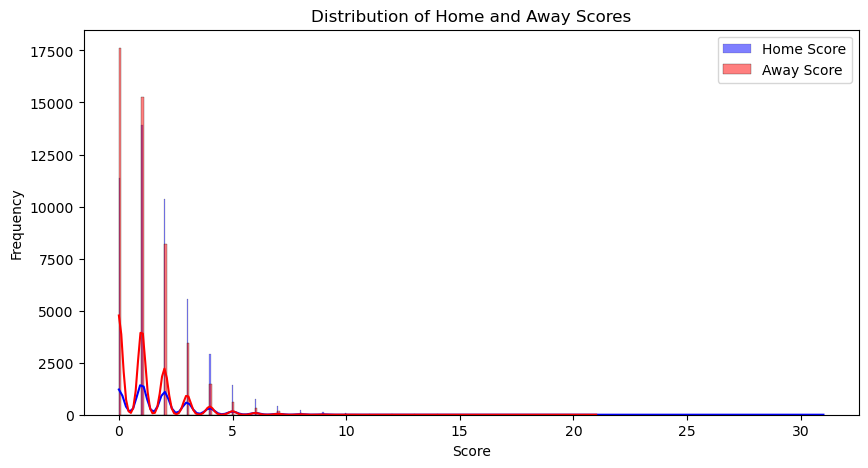

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(results['home_score'], kde=True, color='blue', label='Home Score')
sns.histplot(results['away_score'], kde=True, color='red', label='Away Score')
plt.title('Distribution of Home and Away Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Wins by Home and Away Teams

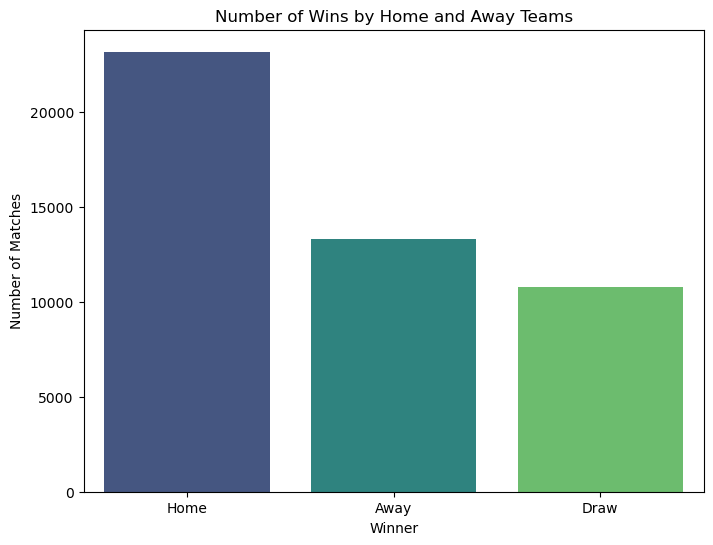

In [113]:
# Determine the winner
results['winner'] = results.apply(lambda row: 'Home' if row['home_score'] > row['away_score'] else ('Away' if row['home_score'] < row['away_score'] else 'Draw'), axis=1)

# Count of wins by home and away teams
win_counts = results['winner'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')
plt.title('Number of Wins by Home and Away Teams')
plt.xlabel('Winner')
plt.ylabel('Number of Matches')
plt.show()


# Average Scores Over Time

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

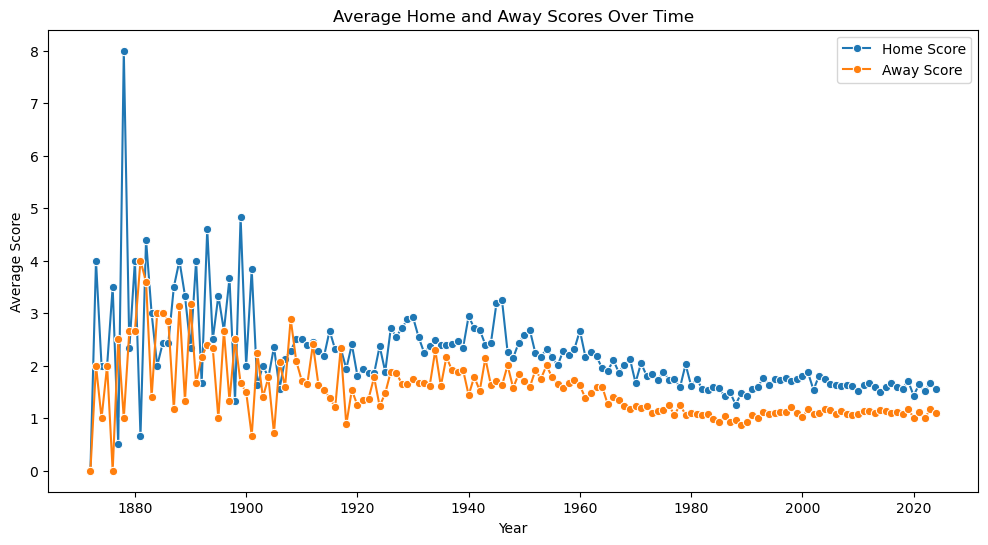

In [114]:
results['date'] = pd.to_datetime(results['date'])
results['year'] = results['date'].dt.year

avg_scores = results.groupby('year')[['home_score', 'away_score']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='home_score', data=avg_scores, label='Home Score', marker='o')
sns.lineplot(x='year', y='away_score', data=avg_scores, label='Away Score', marker='o')
plt.title('Average Home and Away Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend()
plt.show()


# Determine if the home team won

In [115]:
def determine_winner(row):
    if row['home_score'] > row['away_score']:
        return True
    elif row['home_score'] < row['away_score']:
        return False
    else:
        shootout_winner = shootouts[(shootouts['date'] == row['date']) & 
                                    (shootouts['home_team'] == row['home_team']) & 
                                    (shootouts['away_team'] == row['away_team'])]['winner'].values
        return shootout_winner[0] == row['home_team'] if len(shootout_winner) > 0 else None

results['home_team_won'] = results.apply(determine_winner, axis=1)
results['away_team_won'] = [False if value is True else True if value is False else None for value in results['home_team_won']]


In [116]:
# Fill None values in home_team_won with False
results['home_team_won'].fillna(False, inplace=True)
results['away_team_won'].fillna(False, inplace=True)


In [117]:

# Function to calculate home and away win rates
def calculate_home_away_win_rate_avg(df):
    df = df.copy()
    df['home_team_win_rate'] = 0.0
    df['away_team_win_rate'] = 0.0
    home_wins = 0
    home_goals = 0
    away_wins = 0
    away_goals = 0
    total_games = 0
    total_goals = 0

    for i, row in df.iterrows():
        if row['home_team_won']:
            home_wins += 1
        elif row['away_team_won']:
            away_wins += 1
        else:
            home_wins += 0.5
            away_wins += 0.5

        home_goals += row['home_score']
        away_goals += row['away_score']
        total_games += 1
        total_goals += row['home_score'] + row['away_score']

        home_win_rate = home_wins / total_games
        away_win_rate = away_wins / total_games

        if total_goals == 0:
            home_goal_avg = 0
            away_goal_avg = 0
        else:
            if home_wins > 0:
                home_goal_avg = home_wins / total_goals
            else:
                home_goal_avg = 0

            if away_wins > 0:
                away_goal_avg = away_wins / total_goals
            else:
                away_goal_avg = 0


        df.at[i, 'home_team_avg_score'] = home_goal_avg
        df.at[i, 'away_team_avg_score'] = away_goal_avg

        df.at[i, 'home_team_win_rate'] = home_win_rate * 100  # Convert to percentage
        df.at[i, 'away_team_win_rate'] = away_win_rate * 100  # Convert to percentage

    return df



In [118]:

# Sort the results by date
results = results.sort_values('date')


# Calculate home vs away win rate
results = calculate_home_away_win_rate_avg(results)


In [13]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from datetime import datetime


# # Ensure date columns are in datetime format and remove the time component
# results['date'] = pd.to_datetime(results['date']).dt.date
# shootouts['date'] = pd.to_datetime(shootouts['date'], dayfirst=True).dt.date

# # Function to determine match result
# def get_match_result(row):
#     home_team = row['home_team']
#     away_team = row['away_team']
#     home_goals = row['home_score']
#     away_goals = row['away_score']
#     Dategame = row['date']
    
#     if home_goals > away_goals:
#         row['Home_team_won'] = True
#         row['Away_team_won'] = False
#     elif home_goals < away_goals:
#         row['Home_team_won'] = False
#         row['Away_team_won'] = True
#     else:
#         specific_match = shootouts[(shootouts['date'] == Dategame) &
#                                    (shootouts['home_team'] == home_team) &
#                                    (shootouts['away_team'] == away_team)]
#         if not specific_match.empty:
#             if specific_match.iloc[0]['winner'] == home_team:
#                 row['Home_team_won'] = True
#                 row['Away_team_won'] = False
#             else:
#                 row['Home_team_won'] = False
#                 row['Away_team_won'] = True
#         else:
#             row['Home_team_won'] = False
#             row['Away_team_won'] = False

#     return row

# # Apply the function to each row
# results = results.apply(get_match_result, axis=1)

# # Debug: Check for missing values
# print("Missing values after applying get_match_result function:")
# print(results.isnull().sum())

# # Feature Engineering
# results['Total goals in match'] = results['home_score'] + results['away_score']
# results['Goal difference'] = abs(results['home_score'] - results['away_score'])

# # Function to calculate win rate and average goals
# def calculate_team_stats(team, date, home_away):
#     past_matches = results[(results['date'] < date) & ((results['home_team'] == team) | (results['away_team'] == team))]
#     if home_away == 'home':
#         past_matches = past_matches[past_matches['home_team'] == team]
#         win_rate = (past_matches['Home_team_won'] == 1).mean()
#         avg_goals = past_matches['home_score'].mean()
#     else:
#         past_matches = past_matches[past_matches['away_team'] == team]
#         win_rate = (past_matches['Home_team_won'] == 0).mean()
#         avg_goals = past_matches['away_score'].mean()
#     return win_rate, avg_goals

# # Calculate win rates and average goals
# results['Home team win rate'] = results.apply(lambda row: calculate_team_stats(row['home_team'], row['date'], 'home')[0], axis=1)
# results['Home team average goals'] = results.apply(lambda row: calculate_team_stats(row['home_team'], row['date'], 'home')[1], axis=1)
# results['Away team win rate'] = results.apply(lambda row: calculate_team_stats(row['away_team'], row['date'], 'away')[0], axis=1)
# results['Away team average goals'] = results.apply(lambda row: calculate_team_stats(row['away_team'], row['date'], 'away')[1], axis=1)

# # Additional features
# results['Day of the week'] = pd.to_datetime(results['date']).dt.day_name()
# results['Month of the year'] = pd.to_datetime(results['date']).dt.month

# # One-hot encode categorical features
# encoder = OneHotEncoder()
# encoded_features = encoder.fit_transform(results[['Day of the week', 'Month of the year']]).toarray()
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Day of the week', 'Month of the year']))

# # Concatenate encoded features with the results DataFrame
# results = pd.concat([results.reset_index(drop=True), encoded_df], axis=1)

# # Imputation (handle NaN values)
# imputer = SimpleImputer(strategy='mean')
# results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals']] = imputer.fit_transform(results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals']])

# # Transformation
# scaler = StandardScaler()
# results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals', 'Total goals in match', 'Goal difference']] = scaler.fit_transform(results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals', 'Total goals in match', 'Goal difference']])

# # Feature Selection
# # Calculate feature importance using Random Forest
# rf = RandomForestClassifier()
# X = results[['Home team win rate', 'Away team win rate', 'Home team average goals', 'Away team average goals', 'Total goals in match', 'Goal difference'] + list(encoded_df.columns)]
# y = results['Home_team_won']

# # Impute NaN values in X before fitting the model
# X = imputer.fit_transform(X)

# rf.fit(X, y)
# feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# # Select top features
# selected_features = feature_importance.head(10).index.tolist()  # Adjusted to select top 10 features

# # Final dataset
# final_data = results[selected_features + ['Home_team_won']]

# # Save the preprocessed data
# final_data.to_csv('preprocessed_results.csv', index=False)

# print("Preprocessing complete. Data saved to 'preprocessed_results.csv'")

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_71507/4201953507.py:11: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  shootouts['date'] = pd.to_datetime(shootouts['date'], dayfirst=True).dt.date


KeyboardInterrupt: 

In [119]:
display(results.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,home_team_won,away_team_won,home_team_win_rate,away_team_win_rate,home_team_avg_score,away_team_avg_score
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,1872,False,False,50.000000,50.000000,0.000000,0.000000
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Home,1873,True,False,75.000000,25.000000,0.250000,0.083333
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Home,1874,True,False,83.333333,16.666667,0.277778,0.055556
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,1875,False,False,75.000000,25.000000,0.230769,0.076923
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Home,1876,True,False,80.000000,20.000000,0.250000,0.062500


# Goal Difference

In [120]:
results['goal_difference'] = results['home_score'] - results['away_score']


In [121]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,year,home_team_won,away_team_won,home_team_win_rate,away_team_win_rate,home_team_avg_score,away_team_avg_score,goal_difference
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,1872,False,False,50.000000,50.000000,0.000000,0.000000,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Home,1873,True,False,75.000000,25.000000,0.250000,0.083333,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Home,1874,True,False,83.333333,16.666667,0.277778,0.055556,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,1875,False,False,75.000000,25.000000,0.230769,0.076923,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Home,1876,True,False,80.000000,20.000000,0.250000,0.062500,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47321,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Berlin,Germany,True,Draw,2024,False,False,60.400245,39.599755,NaN,NaN,NaN
47320,2024-07-06,NaN,NaN,NaN,NaN,UEFA Euro,Düsseldorf,Germany,True,Draw,2024,False,False,60.400025,39.599975,NaN,NaN,NaN
47322,2024-07-09,NaN,NaN,NaN,NaN,UEFA Euro,Munich,Germany,True,Draw,2024,False,False,60.399806,39.600194,NaN,NaN,NaN
47323,2024-07-10,NaN,NaN,NaN,NaN,UEFA Euro,Dortmund,Germany,True,Draw,2024,False,False,60.399586,39.600414,NaN,NaN,NaN


# Total Goals

In [122]:
results['total_goals'] = results['home_score'] + results['away_score']


# Match Year

In [123]:
import datetime


# Convert the date column to datetime
results['date'] = pd.to_datetime(results['date'])


# Isolate the year from the date
results['match_year'] = results['date'].dt.year

# results['match_year'] = results['date'].dt.year

results['match_year']


0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
47321    2024
47320    2024
47322    2024
47323    2024
47324    2024
Name: match_year, Length: 47325, dtype: int32

In [124]:
# Create a feature of session of the year (Winter, Spring, Summer, Fall)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
results['season'] = results['date'].dt.month.apply(get_season)

results['season']

0          Fall
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
47321    Summer
47320    Summer
47322    Summer
47323    Summer
47324    Summer
Name: season, Length: 47325, dtype: object

In [125]:
import numpy as np

# Generate a feature of the 1/8 of the game where the goal was scored
goalscorers['goal_eighth'] = np.nan

for i in range(len(goalscorers['minute'])):
    if goalscorers['minute'][i] <= 15:
        goalscorers['goal_eighth'][i] = '1st'
    elif goalscorers['minute'][i] <= 30:
        goalscorers['goal_eighth'][i] = '2nd'
    elif goalscorers['minute'][i] <= 45:
        goalscorers['goal_eighth'][i] = '3rd'
    elif goalscorers['minute'][i] <= 60:
        goalscorers['goal_eighth'][i] = '4th'
    elif goalscorers['minute'][i] <= 75:
        goalscorers['goal_eighth'][i] = '5th'
    elif goalscorers['minute'][i] <= 90:
        goalscorers['goal_eighth'][i] = '6th'
    else:
        goalscorers['goal_eighth'][i] = 'Extra Time'



goalscorers['goal_eighth']

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/4158343748.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goalscorers['goal_eighth'][i] = '3rd'
/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/4158343748.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3rd' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  goalscorers['goal_eighth'][i] = '3rd'


0        3rd
1        4th
2        5th
3        5th
4        1st
        ... 
44124    4th
44125    5th
44126    4th
44127    6th
44128    6th
Name: goal_eighth, Length: 44129, dtype: object

In [126]:
# Generate a feature of the number of goals scored by each player
goalscorers['goal_count_by_player'] = goalscorers.groupby('scorer')['scorer'].transform('count')

goalscorers['goal_count_by_player']

0        4.0
1        5.0
2        5.0
3        4.0
4        4.0
        ... 
44124    2.0
44125    2.0
44126    3.0
44127    1.0
44128    1.0
Name: goal_count_by_player, Length: 44129, dtype: float64

In [127]:
# Generate a feature of the number of goals scored by each team
goalscorers['goal_count_by_team'] = goalscorers.groupby('team')['team'].transform('count')


In [128]:
results['winning_team'] = np.nan

results.dropna(subset=['home_score', 'away_score'], inplace=True)

for i in results.iterrows():
    if i[1]['home_score'] > i[1]['away_score']:
        results['winning_team'][i[0]] = i[1]['home_team']
    elif i[1]['home_score'] < i[1]['away_score']:
        results['winning_team'][i[0]] = i[1]['away_team']
    else:
        results['winning_team'][i[0]] = 'Draw'

results['winning_team']


/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/1711396935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['winning_team'][i[0]] = 'Draw'
/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/1711396935.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Draw' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  results['winning_team'][i[0]] = 'Draw'


0            Draw
1         England
2        Scotland
3            Draw
4        Scotland
           ...   
47230       Sudan
47237     Morocco
47238        Draw
47239       Gabon
47240     Burundi
Name: winning_team, Length: 47267, dtype: object

In [129]:

# Convert the 'date' column to datetime in both dataframes
results['date'] = pd.to_datetime(results['date'])
goalscorers['date'] = pd.to_datetime(goalscorers['date'])

# Now you can perform the merge
merged_df = pd.merge(results, goalscorers, on=['date', 'home_team', 'away_team'], how='outer')

display(merged_df.head())

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner,...,season,winning_team,team,scorer,minute,own_goal,penalty,goal_eighth,goal_count_by_player,goal_count_by_team
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,...,Fall,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,Home,...,Spring,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Home,...,Spring,Scotland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,...,Spring,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Home,...,Spring,Scotland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Generate a feature of the number of goals scored by each team per eighth of the game
merged_df['goal_count_by_team_per_eighth'] = merged_df.groupby(['team', 'goal_eighth'])['team'].transform('count')

merged_df['goal_count_by_team_per_eighth']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
77100   NaN
77101   NaN
77102   NaN
77103   NaN
77104   NaN
Name: goal_count_by_team_per_eighth, Length: 77105, dtype: float64

In [131]:
# Generate a feature of the number of goals scored by each player per eighth of the game
merged_df['goal_count_by_player_per_eighth'] = merged_df.groupby(['scorer', 'goal_eighth'])['scorer'].transform('count')

In [132]:
# Generate a feature of the number of goals scored by each team per eighth per season
merged_df['goal_count_by_team_per_eighth_per_season'] = merged_df.groupby(['team', 'goal_eighth', 'season'])['team'].transform('count')

In [133]:
# Generate a feature of the number of goals scored by each player per eighth per season
merged_df['goal_count_by_player_per_eighth_per_season'] = merged_df.groupby(['scorer', 'goal_eighth', 'season'])['scorer'].transform('count')

In [ ]:
#

In [134]:
# Function to calculate the decade
def calculate_decade(year):
    return (year // 10) * 10

# If 'match_year' is a datetime column, extract the year
if isinstance(merged_df['match_year'].iloc[0], pd.Timestamp):
    merged_df['match_year'] = merged_df['match_year'].dt.year

# Apply the function to the 'match_year' column
merged_df['decade'] = merged_df['match_year'].apply(calculate_decade)
merged_df['decade'] = merged_df['decade'].astype('category')
merged_df['decade']

0        1870
1        1870
2        1870
3        1870
4        1870
         ... 
77100    2020
77101    2020
77102    2020
77103    2020
77104    2020
Name: decade, Length: 77105, dtype: category
Categories (16, int64): [1870, 1880, 1890, 1900, ..., 1990, 2000, 2010, 2020]

In [135]:
# Generate a feature of if the game was at home or away (boolean)
merged_df['home_game'] = merged_df['home_team'] == merged_df['team']
merged_df['home_game'] 

0        False
1        False
2        False
3        False
4        False
         ...  
77100    False
77101    False
77102    False
77103    False
77104    False
Name: home_game, Length: 77105, dtype: bool

In [157]:
# Generate a feature of the number of goals scored by each team per eighth per decade
merged_df['goal_count_by_team_per_eighth_per_decade'] = merged_df.groupby(['team', 'goal_eighth', 'decade'])['team'].transform('count')
merged_df['goal_count_by_team_per_eighth_per_decade']

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/3383803902.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df['goal_count_by_team_per_eighth_per_decade'] = merged_df.groupby(['team', 'goal_eighth', 'decade'])['team'].transform('count')


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
77100   NaN
77101   NaN
77102   NaN
77103   NaN
77104   NaN
Name: goal_count_by_team_per_eighth_per_decade, Length: 77105, dtype: float64

In [158]:
# Generate a feature of the number of goals scored by each player per eighth per decade
merged_df['goal_count_by_player_per_eighth_per_decade'] = merged_df.groupby(['scorer', 'goal_eighth', 'decade'])['scorer'].transform('count')
merged_df['goal_count_by_player_per_eighth_per_decade']

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/1902842735.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df['goal_count_by_player_per_eighth_per_decade'] = merged_df.groupby(['scorer', 'goal_eighth', 'decade'])['scorer'].transform('count')


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
77100   NaN
77101   NaN
77102   NaN
77103   NaN
77104   NaN
Name: goal_count_by_player_per_eighth_per_decade, Length: 77105, dtype: float64

In [159]:
# Generate a feature of the number of goals scored by each team per eighth per season per decade
merged_df['goal_count_by_team_per_eighth_per_season_per_decade'] = merged_df.groupby(['team', 'goal_eighth', 'season', 'decade'])['team'].transform('count')
merged_df['goal_count_by_team_per_eighth_per_season_per_decade']

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/3738784226.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df['goal_count_by_team_per_eighth_per_season_per_decade'] = merged_df.groupby(['team', 'goal_eighth', 'season', 'decade'])['team'].transform('count')


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
77100   NaN
77101   NaN
77102   NaN
77103   NaN
77104   NaN
Name: goal_count_by_team_per_eighth_per_season_per_decade, Length: 77105, dtype: float64

In [160]:
# Generate a feature of the number of goals scored by each player per eighth per season per decade
merged_df['goal_count_by_player_per_eighth_per_season_per_decade'] = merged_df.groupby(['scorer', 'goal_eighth', 'season', 'decade'])['scorer'].transform('count')
merged_df['goal_count_by_player_per_eighth_per_season_per_decade']

/var/folders/5g/7gzv8rg14tv7prkqk0v2f3280000gn/T/ipykernel_91649/2269238513.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df['goal_count_by_player_per_eighth_per_season_per_decade'] = merged_df.groupby(['scorer', 'goal_eighth', 'season', 'decade'])['scorer'].transform('count')


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
77100   NaN
77101   NaN
77102   NaN
77103   NaN
77104   NaN
Name: goal_count_by_player_per_eighth_per_season_per_decade, Length: 77105, dtype: float64

In [208]:
# Import the necessary libraries for training the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [137]:
merged_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'winner', 'year',
       'home_team_won', 'away_team_won', 'home_team_win_rate',
       'away_team_win_rate', 'home_team_avg_score', 'away_team_avg_score',
       'goal_difference', 'total_goals', 'match_year', 'season',
       'winning_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty',
       'goal_eighth', 'goal_count_by_player', 'goal_count_by_team',
       'goal_count_by_team_per_eighth', 'goal_count_by_player_per_eighth',
       'goal_count_by_team_per_eighth_per_season',
       'goal_count_by_player_per_eighth_per_season', 'decade', 'home_game'],
      dtype='object')

In [91]:
def determine_winner(row):
    if row['home_score'] > row['away_score']:
        return True
    elif row['home_score'] < row['away_score']:
        return False
    else:
        shootout_winner = shootouts[(shootouts['date'] == row['date']) & 
                                    (shootouts['home_team'] == row['home_team']) & 
                                    (shootouts['away_team'] == row['away_team'])]['winner'].values
        return shootout_winner[0] == row['home_team'] if len(shootout_winner) > 0 else None

merged_df['home_team_won'] = merged_df.apply(determine_winner, axis=1)


In [145]:
# Drop the columns that are not needed for training the model
training_model_df = merged_df.drop(columns=['date', 'home_team', 'away_team', 'home_score', 'away_score', 'winner', 'city', 'country', 'neutral', 'away_team_won', 'home_team_win_rate',
       'away_team_win_rate', 'home_team_avg_score', 'away_team_avg_score','winning_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty',
       'goal_eighth', 'goal_count_by_player', 'goal_count_by_team',
       'goal_count_by_team_per_eighth', 'goal_count_by_player_per_eighth',
       'goal_count_by_team_per_eighth_per_season',
       'goal_count_by_player_per_eighth_per_season',
       'goal_difference', 'total_goals', 'year', 'match_year'])


In [146]:
display(training_model_df.head())

,tournament,home_team_won,season,decade,home_game
0,Friendly,False,Fall,1870,False
1,Friendly,True,Spring,1870,False
2,Friendly,True,Spring,1870,False
3,Friendly,False,Spring,1870,False
4,Friendly,True,Spring,1870,False


In [147]:
# One-hot encode the tournament feature, season, and decade
training_model_df = pd.get_dummies(training_model_df, columns=['tournament', 'season', 'decade'])

In [148]:
display(f'Training Model length before dropping NaN values: {len(training_model_df)}')

# Drop the rows with NaN values
training_model_df.dropna(inplace=True)

display(f'Training Model length after dropping NaN values: {len(training_model_df)}')

'Training Model length before dropping NaN values: 77105'

'Training Model length after dropping NaN values: 77105'

# Conclusions Before Modeling

- There is no nan values in the dataset so we don't need to worry about imputing missing values.

In [149]:
# Model Training
# Split the data into features and target variable
X = training_model_df.drop(columns=['home_team_won'])
y = training_model_df['home_team_won']

# Split the data into training, validation, and test sets (70% train, 20% validation, 10% test)
X_train = X[:int(0.7*len(X))]
y_train = y[:int(0.7*len(y))]

X_val = X[int(0.7*len(X)):int(0.9*len(X))]
y_val = y[int(0.7*len(y)):int(0.9*len(y))]

X_test = X[int(0.9*len(X)):]
y_test = y[int(0.9*len(y)):]

# Initializations of the Random Forest Model

- We will start by initializing the Random Forest model with the default parameters. We will then use the RandomizedSearchCV to find the best parameters for the model, and then we will use the best parameters to train the models.

- Maybe we will see that some of the features are not important and we can drop them.

Validation Accuracy: 0.6975552817586408


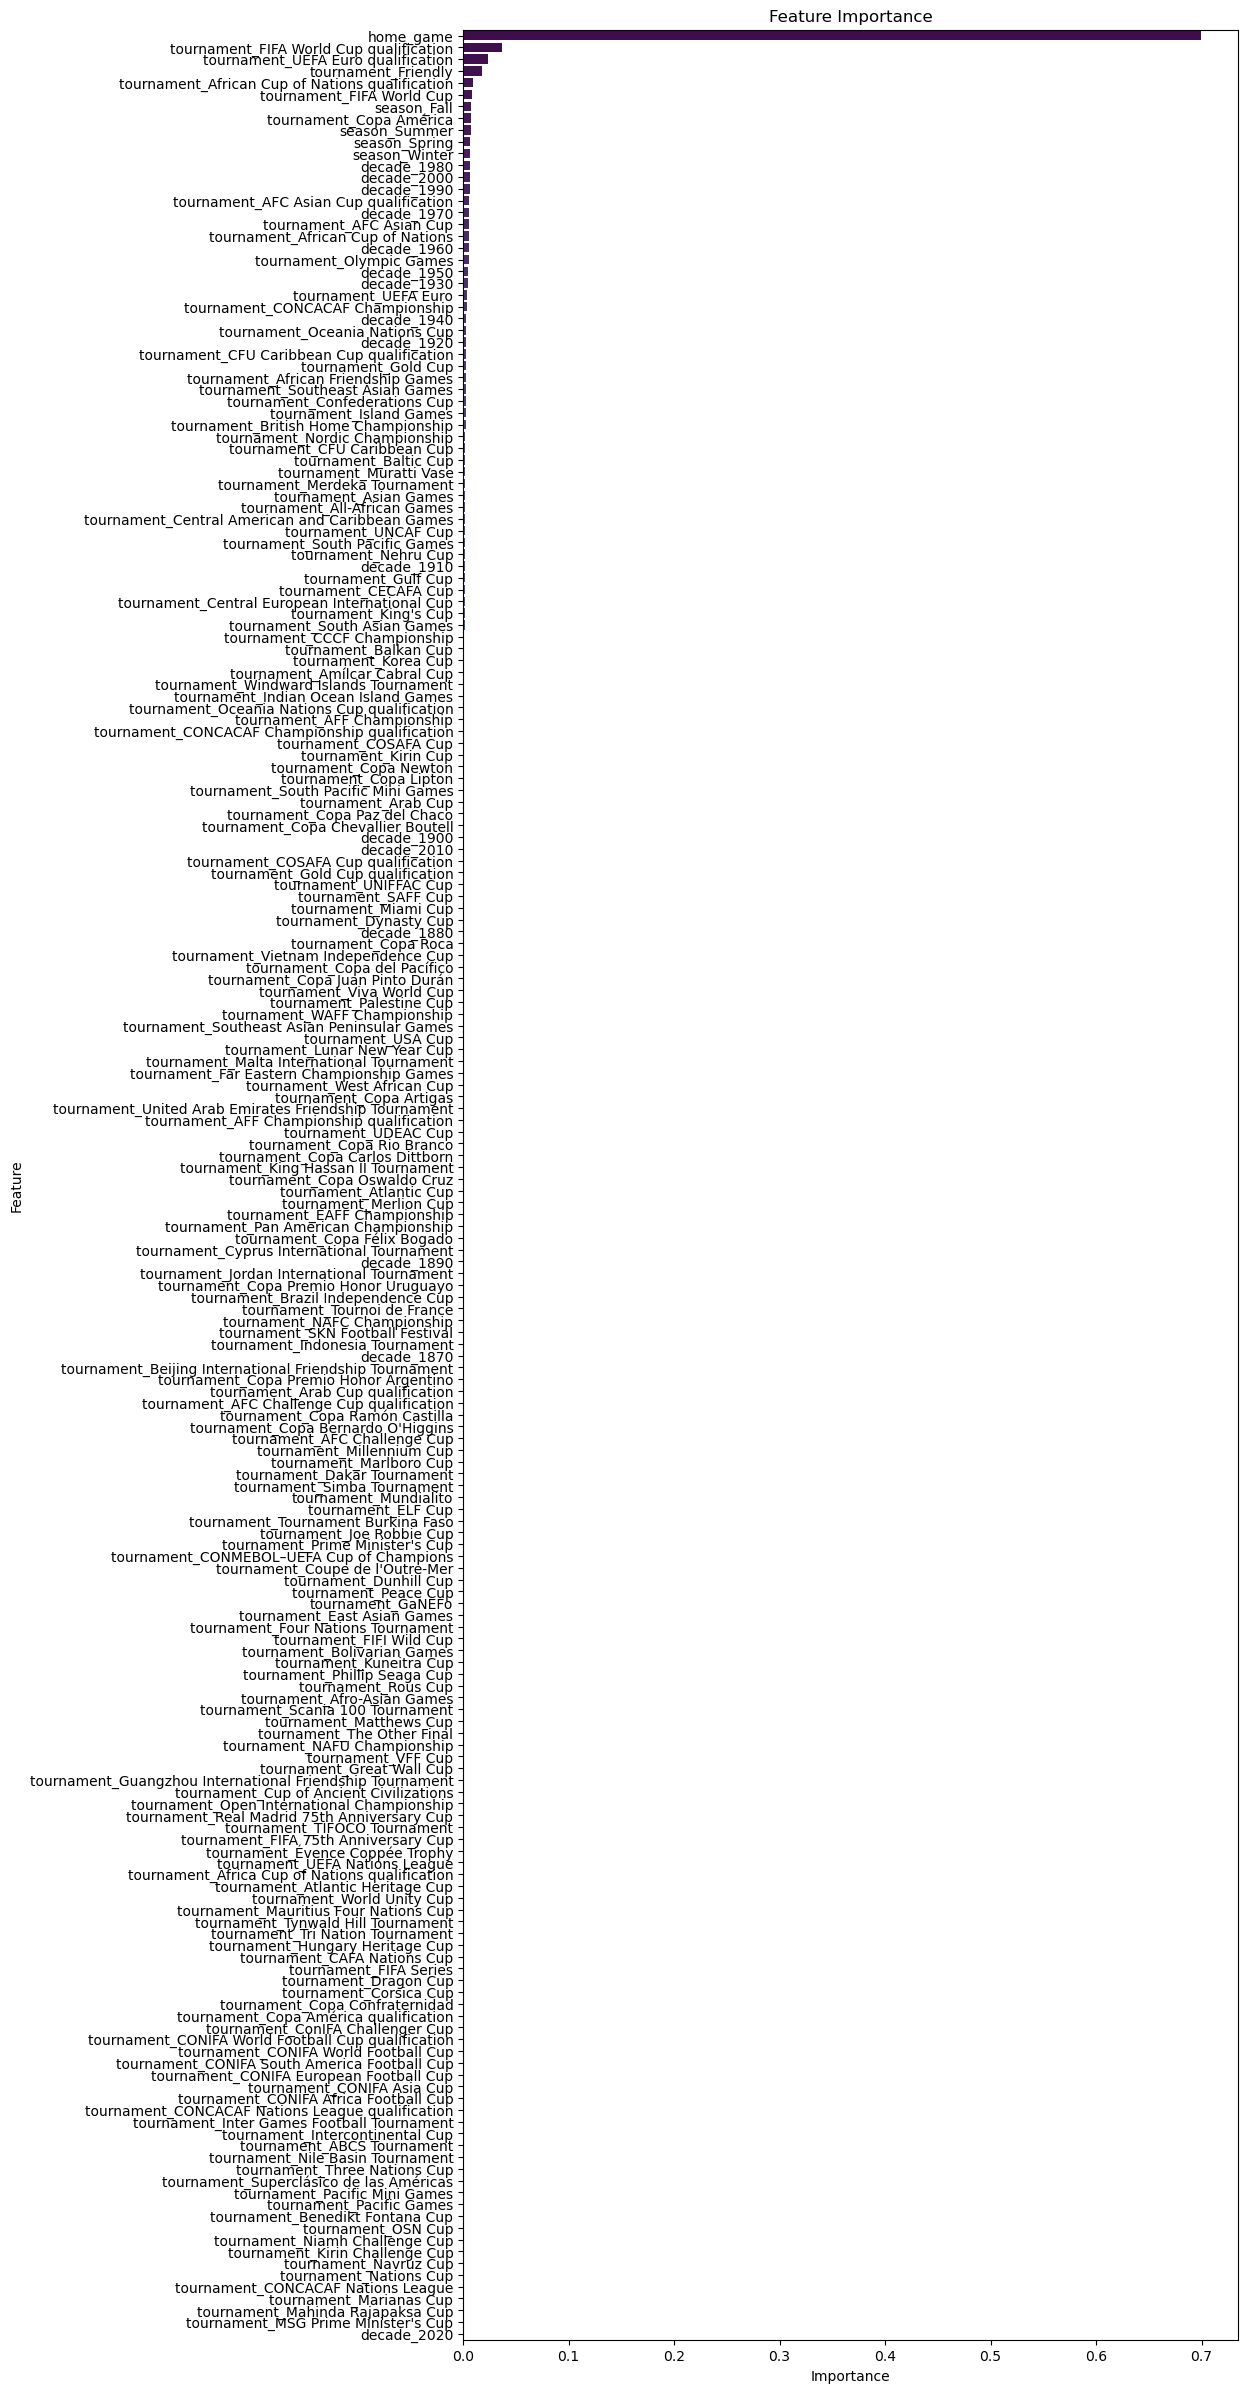

In [152]:
# Initialize the model
RFmodel = RandomForestClassifier()

# Fit the model
RFmodel.fit(X_train, y_train)

# Make predictions
y_pred = RFmodel.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy}')

# Feature Importance
feature_importance = pd.Series(RFmodel.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 30))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


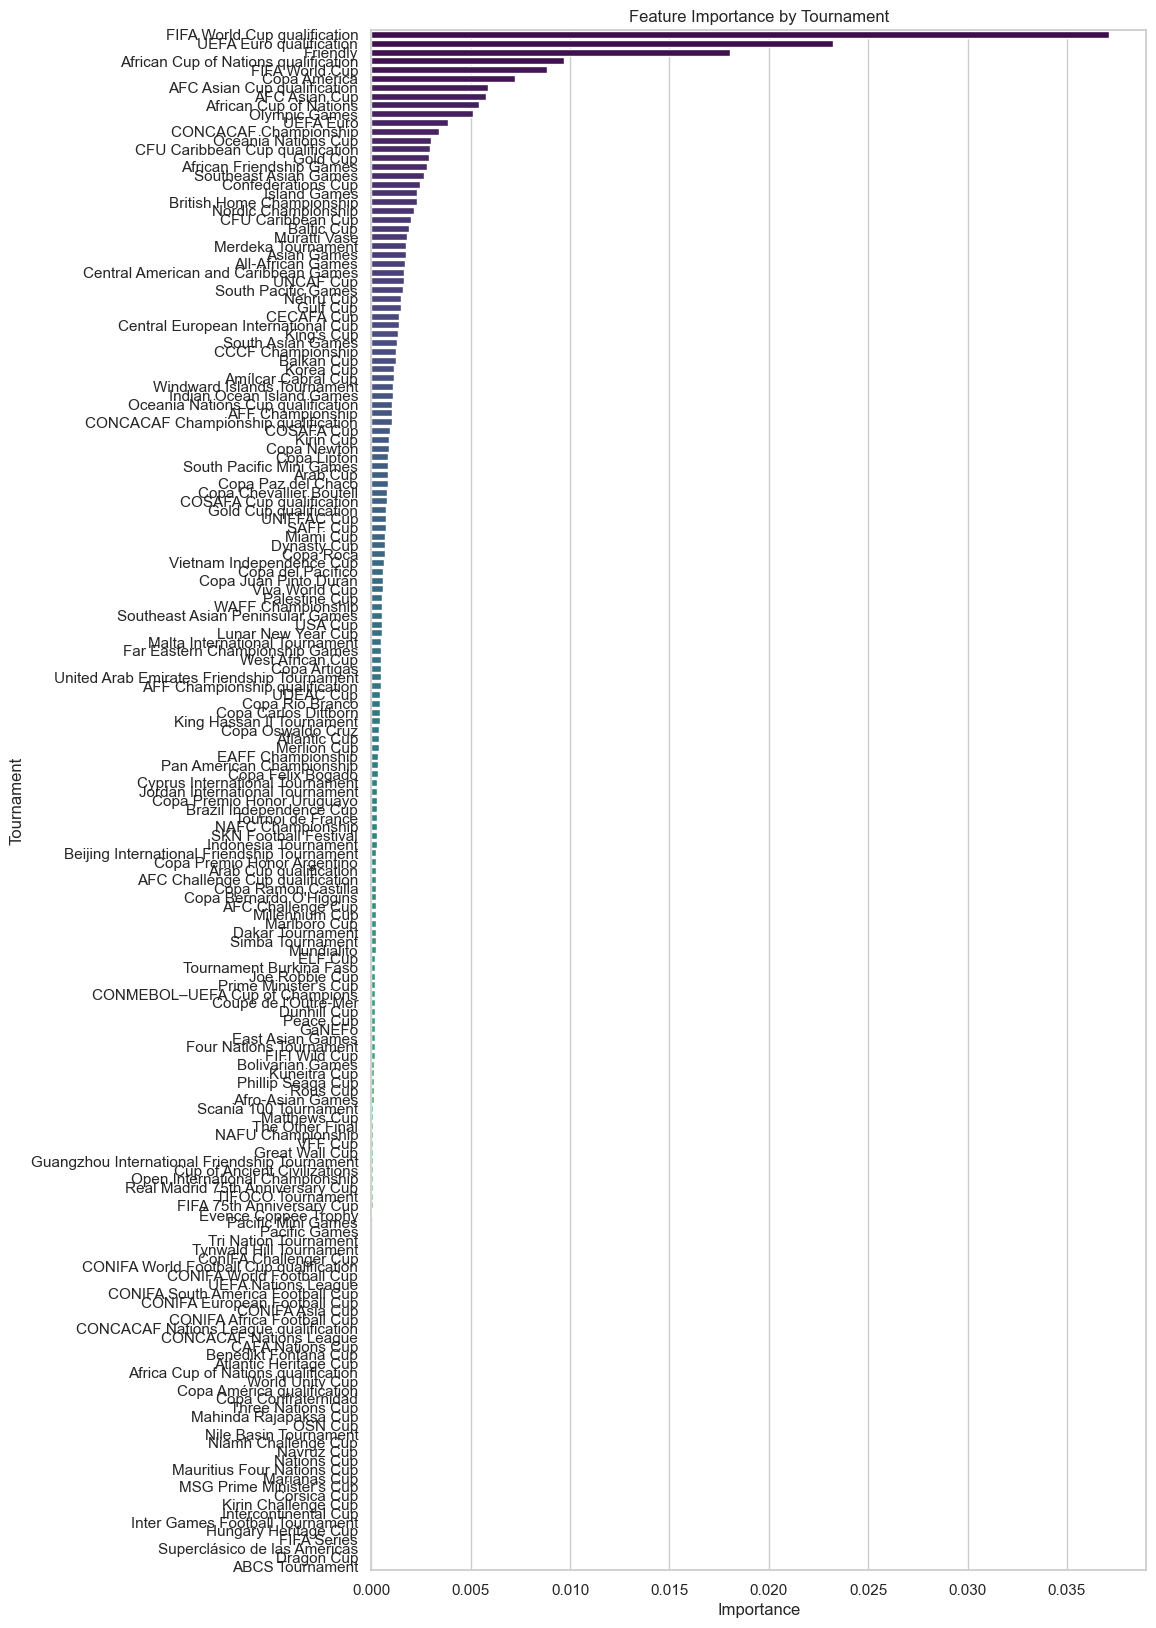

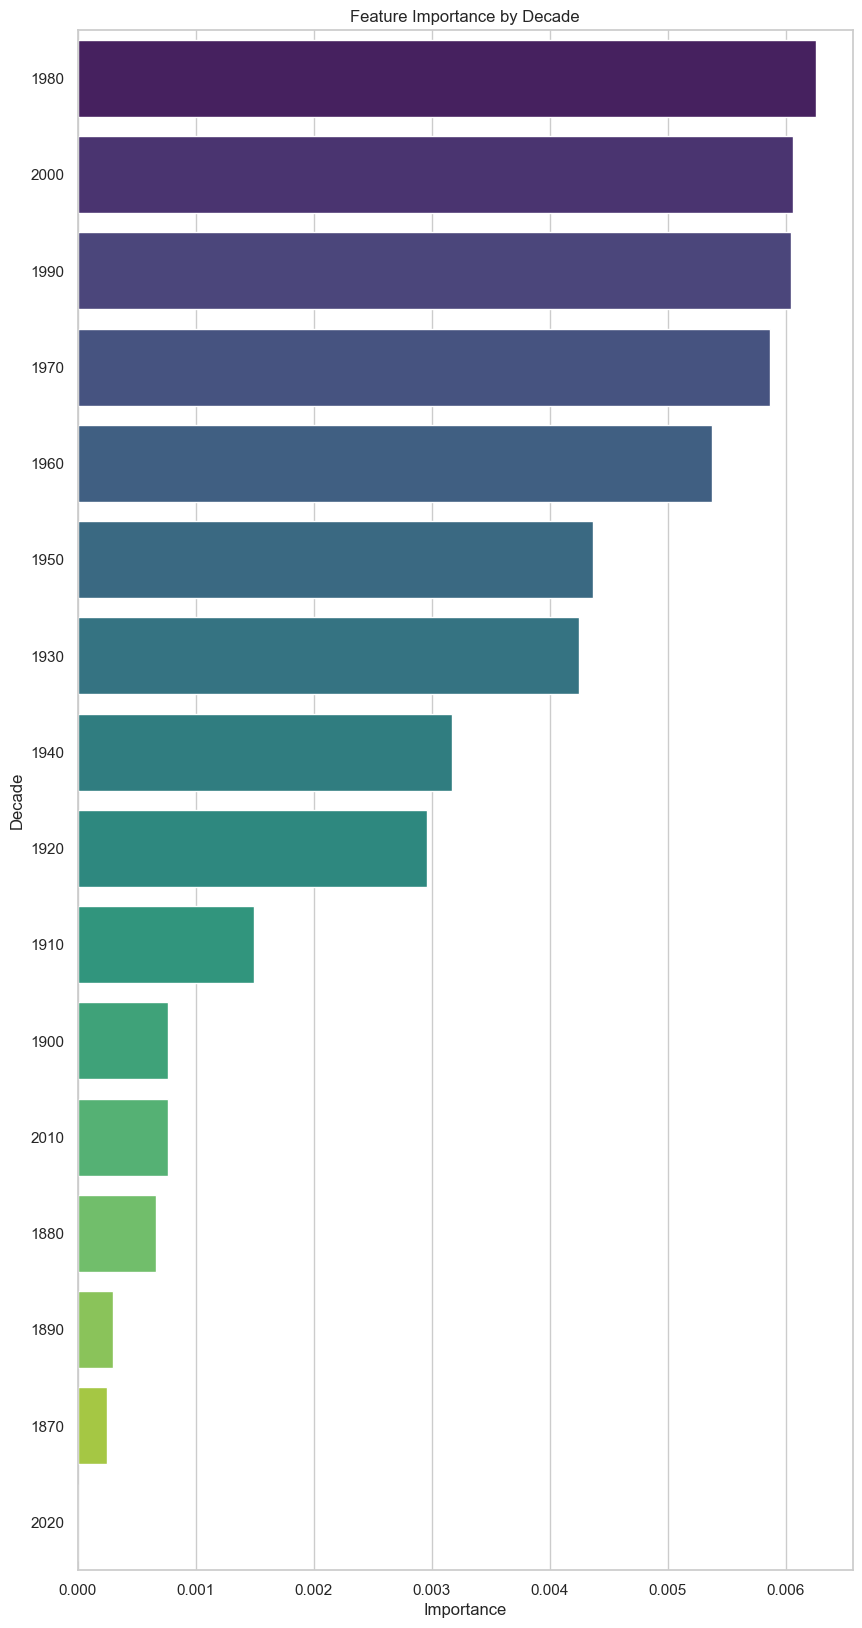

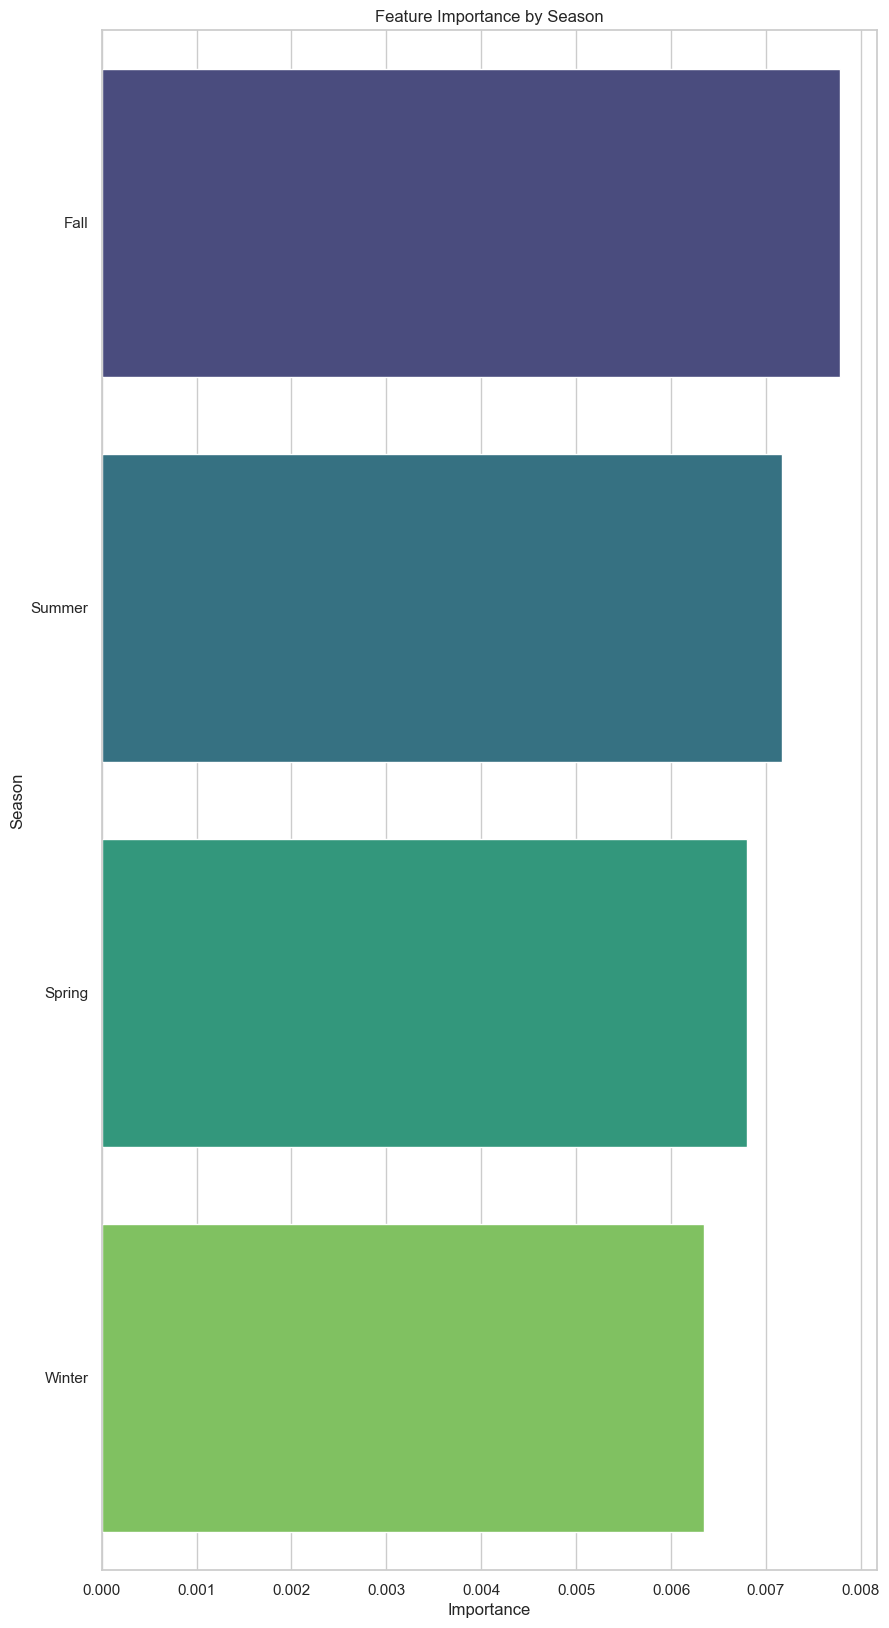

In [161]:
# Aggregating the features by tournament vs decade vs season
# Group the features importance by tournament
tournament_features = feature_importance[[col for col in feature_importance.index if 'tournament' in col]]
tournament_features = tournament_features.groupby(lambda x: x.split('_')[1], axis=0).mean()
# Sort the features by importance
tournament_features = tournament_features.sort_values(ascending=False)

# Group the features importance by decade
decade_features = feature_importance[[col for col in feature_importance.index if 'decade' in col]]
decade_features = decade_features.groupby(lambda x: x.split('_')[1], axis=0).mean()
# Sort the features by importance
decade_features = decade_features.sort_values(ascending=False)


# Group the features importance by season
season_features = feature_importance[[col for col in feature_importance.index if 'season' in col]]
season_features = season_features.groupby(lambda x: x.split('_')[1], axis=0).mean()
# Sort the features by importance
season_features = season_features.sort_values(ascending=False)

# Plot the feature importance by tournament
plt.figure(figsize=(10, 20))
sns.set(style='whitegrid')

sns.barplot(x=tournament_features, y=tournament_features.index, palette='viridis')
plt.title('Feature Importance by Tournament')
plt.xlabel('Importance')
plt.ylabel('Tournament')
plt.show()

# Plot the feature importance by decade
plt.figure(figsize=(10, 20))
sns.set(style='whitegrid')

sns.barplot(x=decade_features, y=decade_features.index, palette='viridis')
plt.title('Feature Importance by Decade')
plt.xlabel('Importance')
plt.ylabel('Decade')
plt.show()

# Plot the feature importance by season
plt.figure(figsize=(10, 20))
# add grid
sns.set(style='whitegrid')
sns.barplot(x=season_features, y=season_features.index, palette='viridis')
plt.title('Feature Importance by Season')
plt.xlabel('Importance')
plt.ylabel('Season')
plt.show()



# Feature Importance

- We can see that the most important features are the place where the match is played, home or away.

- We can also see a lot of features that there importent is very low vs some that have a high importance especially when we are check the importance of the tournament features. So we going to aggregate the features under the tournament feature by the most frequent tournaments. i.e. FIFA World Cup, UEFA Euro, Friendlies, or others.

- Similarly, we can see that the decade of the match is important, but having a lot of variables is not good for the model. So we can aggregate the years into 30 years intervals.



In [162]:
# get the tournament feature back from the merged_df after dropping the tournament columns

for col in training_model_df.columns:
    if 'tournament' in col:
        training_model_df.drop(columns=col, inplace=True)

training_model_df['tournament'] = merged_df['tournament']



In [170]:
# Get the decade feature back from the merged_df after dropping the decade columns
for col in training_model_df.columns:
    if 'decade' in col:
        training_model_df.drop(columns=col, inplace=True)
        
training_model_df['decade'] = merged_df['decade']

In [164]:
training_model_df

,home_team_won,home_game,season_Fall,season_Spring,season_Summer,season_Winter,tournament,decade
0,False,False,True,False,False,False,Friendly,1870
1,True,False,False,True,False,False,Friendly,1870
2,True,False,False,True,False,False,Friendly,1870
3,False,False,False,True,False,False,Friendly,1870
4,True,False,False,True,False,False,Friendly,1870
...,...,...,...,...,...,...,...,...
77100,False,False,False,False,True,False,FIFA World Cup qualification,2020
77101,True,False,False,False,True,False,FIFA World Cup qualification,2020
77102,False,False,False,False,True,False,FIFA World Cup qualification,2020
77103,True,False,False,False,True,False,FIFA World Cup qualification,2020


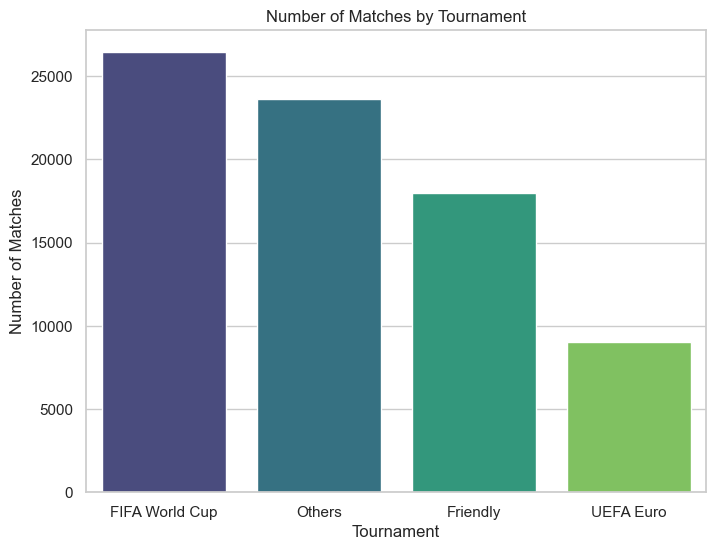

,home_team_won,home_game,season_Fall,season_Spring,season_Summer,season_Winter,tournament,decade
0,False,False,True,False,False,False,Friendly,1870
1,True,False,False,True,False,False,Friendly,1870
2,True,False,False,True,False,False,Friendly,1870
3,False,False,False,True,False,False,Friendly,1870
4,True,False,False,True,False,False,Friendly,1870
...,...,...,...,...,...,...,...,...
77100,False,False,False,False,True,False,FIFA World Cup,2020
77101,True,False,False,False,True,False,FIFA World Cup,2020
77102,False,False,False,False,True,False,FIFA World Cup,2020
77103,True,False,False,False,True,False,FIFA World Cup,2020


In [166]:
# Aggregating the tournament feature by FIFA World Cup, UEFA Euro, Friendly, and others
for i, row in training_model_df.iterrows():
    if 'FIFA World Cup' in row['tournament']:
        training_model_df.at[i, 'tournament'] = 'FIFA World Cup'
    elif 'UEFA Euro' in row['tournament']:
        training_model_df.at[i, 'tournament'] = 'UEFA Euro'
    elif 'Friendly' in row['tournament']:
        training_model_df.at[i, 'tournament'] = 'Friendly'
    else:
        training_model_df.at[i, 'tournament'] = 'Others'

count_tournament = training_model_df['tournament'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=count_tournament.index, y=count_tournament.values, palette='viridis')
plt.title('Number of Matches by Tournament')
plt.xlabel('Tournament')
plt.ylabel('Number of Matches')
plt.show()


# Group the features importance by tournament
display(training_model_df)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


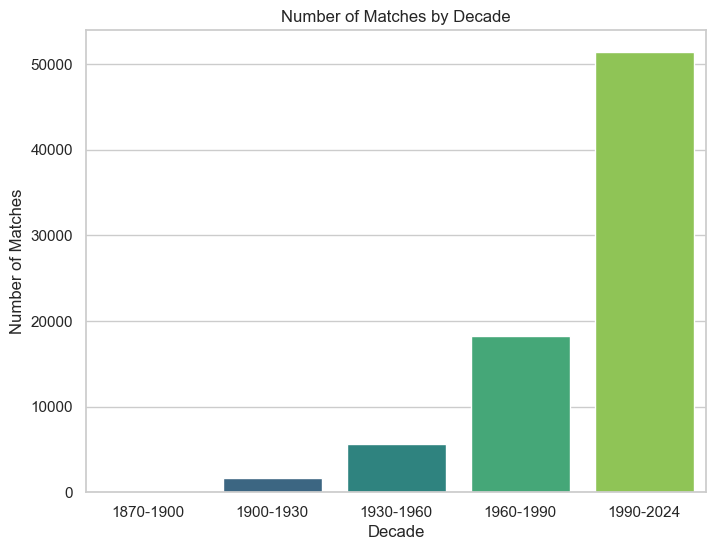

,home_team_won,home_game,season_Fall,season_Spring,season_Summer,season_Winter,tournament,decade
0,False,False,True,False,False,False,Friendly,1870-1900
1,True,False,False,True,False,False,Friendly,1870-1900
2,True,False,False,True,False,False,Friendly,1870-1900
3,False,False,False,True,False,False,Friendly,1870-1900
4,True,False,False,True,False,False,Friendly,1870-1900
...,...,...,...,...,...,...,...,...
77100,False,False,False,False,True,False,FIFA World Cup,1990-2024
77101,True,False,False,False,True,False,FIFA World Cup,1990-2024
77102,False,False,False,False,True,False,FIFA World Cup,1990-2024
77103,True,False,False,False,True,False,FIFA World Cup,1990-2024


In [171]:
# Aggregating the decade feature by intervals of 30 years
# Add new categories to the 'decade' column
training_model_df['decade'] = training_model_df['decade'].cat.add_categories(['1870-1900', '1900-1930', '1930-1960', '1960-1990', '1990-2024'])

for i, row in training_model_df.iterrows():
    if row['decade'] < 1900:
        training_model_df.at[i, 'decade'] = '1870-1900'
    elif row['decade'] < 1930:
        training_model_df.at[i, 'decade'] = '1900-1930'
    elif row['decade'] < 1960:
        training_model_df.at[i, 'decade'] = '1930-1960'
    elif row['decade'] < 1990:
        training_model_df.at[i, 'decade'] = '1960-1990'
    else:
        training_model_df.at[i, 'decade'] = '1990-2024'

training_model_df['decade'] = training_model_df['decade'].cat.remove_unused_categories()

count_decade = training_model_df['decade'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=count_decade.index, y=count_decade.values, palette='viridis')
plt.title('Number of Matches by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Matches')
plt.show()

# Group the features importance by decade
display(training_model_df)

    

Validation Accuracy: 0.6997600674405032


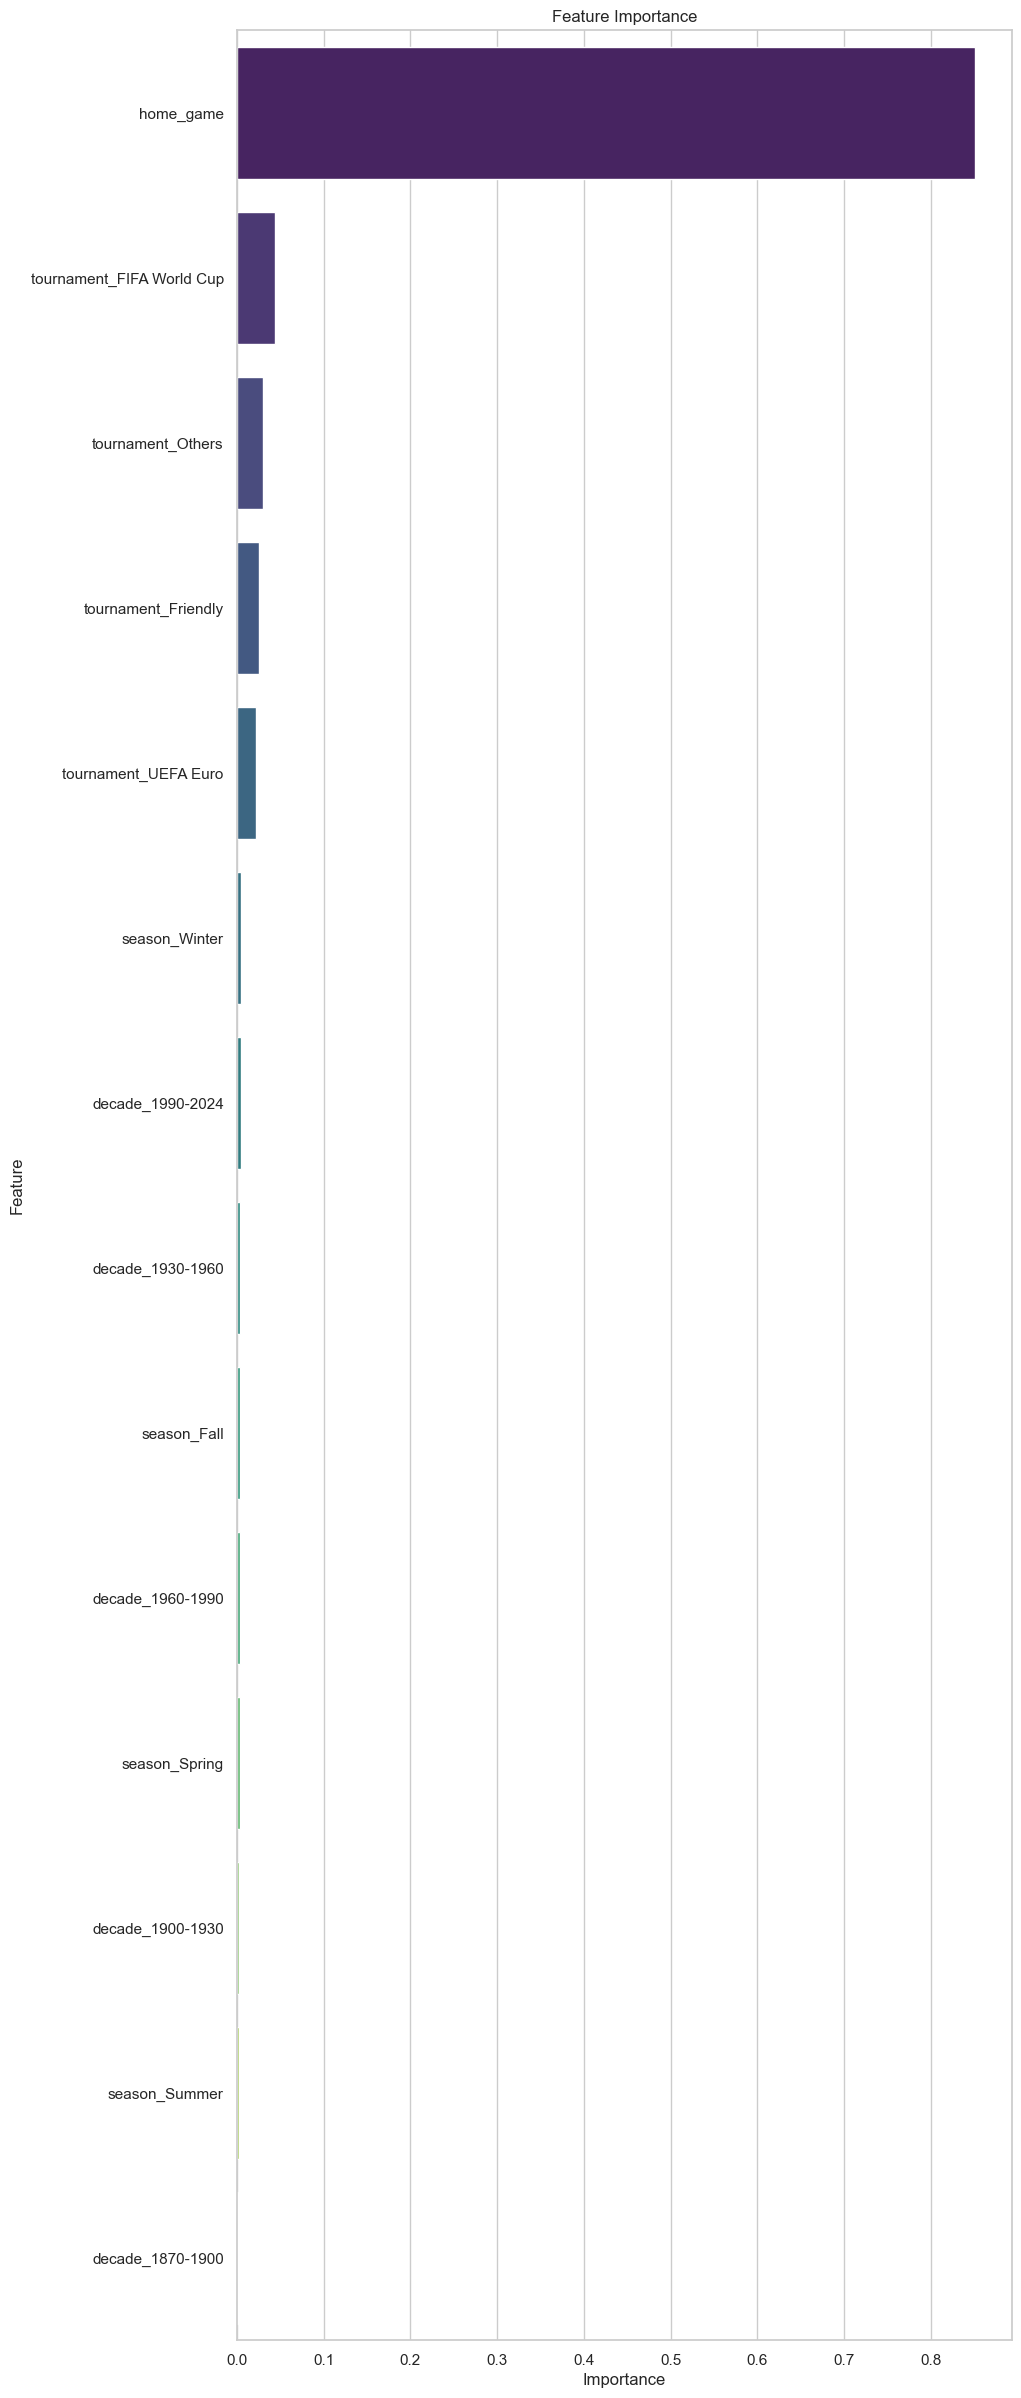

In [172]:
# One-hot encode the tournament and decade features
training_model_df = pd.get_dummies(training_model_df, columns=['tournament', 'decade'])

# Split the data into features and target variable
X = training_model_df.drop(columns=['home_team_won'])
y = training_model_df['home_team_won']

# Split the data into training, validation, and test sets (70% train, 20% validation, 10% test)
X_train = X[:int(0.7*len(X))]
y_train = y[:int(0.7*len(y))]

X_val = X[int(0.7*len(X)):int(0.9*len(X))]
y_val = y[int(0.7*len(y)):int(0.9*len(y))]

X_test = X[int(0.9*len(X)):]
y_test = y[int(0.9*len(y)):]

# Initialize the model
RFmodel = RandomForestClassifier()

# Fit the model
RFmodel.fit(X_train, y_train)

# Make predictions
y_pred = RFmodel.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy}')

# Feature Importance
feature_importance = pd.Series(RFmodel.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 30))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


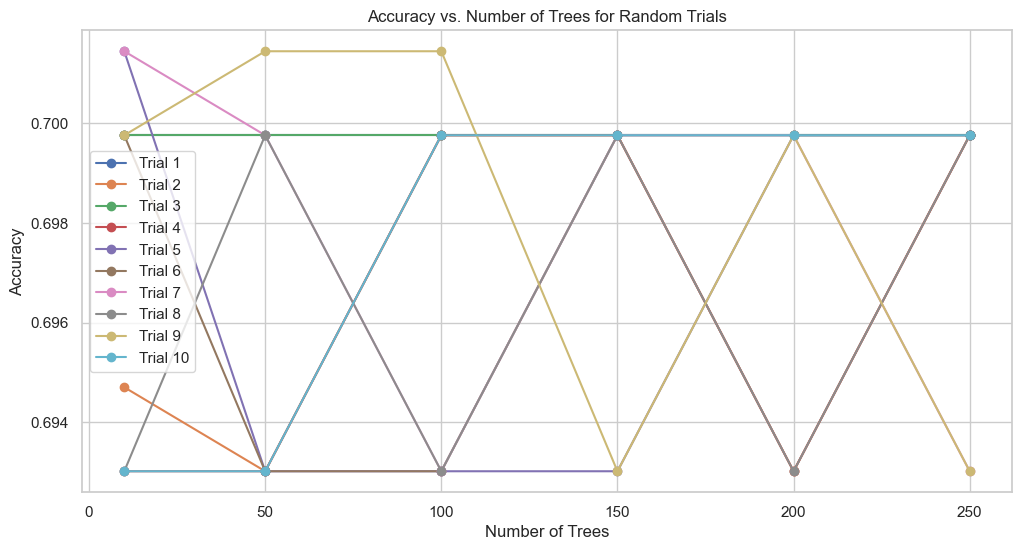

In [182]:
# Find the number of trees that gives the best accuracy
n_trees = [10, 50, 100, 150, 200, 250]

random_trials = []

for i in range(10):
    accuracies = []
    for n in n_trees:
        RFmodel = RandomForestClassifier(n_estimators=n)
        RFmodel.fit(X_train, y_train)
        y_pred = RFmodel.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)
    random_trials.append(accuracies)

# Create a line plot of the accuracy vs. number of trees for each random trial
plt.figure(figsize=(12, 6))
for i, trial in enumerate(random_trials):
    plt.plot(n_trees, trial, marker='o', label=f'Trial {i+1}')

plt.title('Accuracy vs. Number of Trees for Random Trials')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




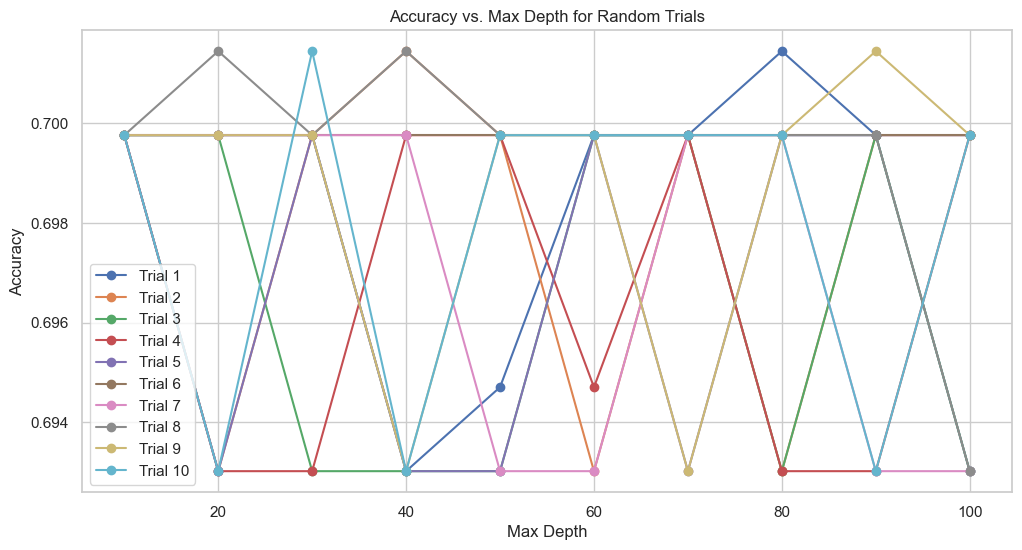

In [184]:
# Find the number of trees that gives the best accuracy
max_depths = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

random_trials = []

for i in range(10):
    accuracies = []
    for n in max_depths:
        RFmodel = RandomForestClassifier(max_depth=n)
        RFmodel.fit(X_train, y_train)
        y_pred = RFmodel.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)
    random_trials.append(accuracies)

# Create a line plot of the accuracy vs. number of trees for each random trial
plt.figure(figsize=(12, 6))
for i, trial in enumerate(random_trials):
    plt.plot(max_depths, trial, marker='o', label=f'Trial {i+1}')

plt.title('Accuracy vs. Max Depth for Random Trials')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Due to the nature of the random forest model, we can't see the change in the hyperparameters of the model between each random trial. Not for the number of trees, nor for the max depth of the trees. So we can't see the effect of the hyperparameters on the model. But we can see the ceiling of the model accuracy on somewhere around 0.7.

Test Accuracy: 0.7135261315004539


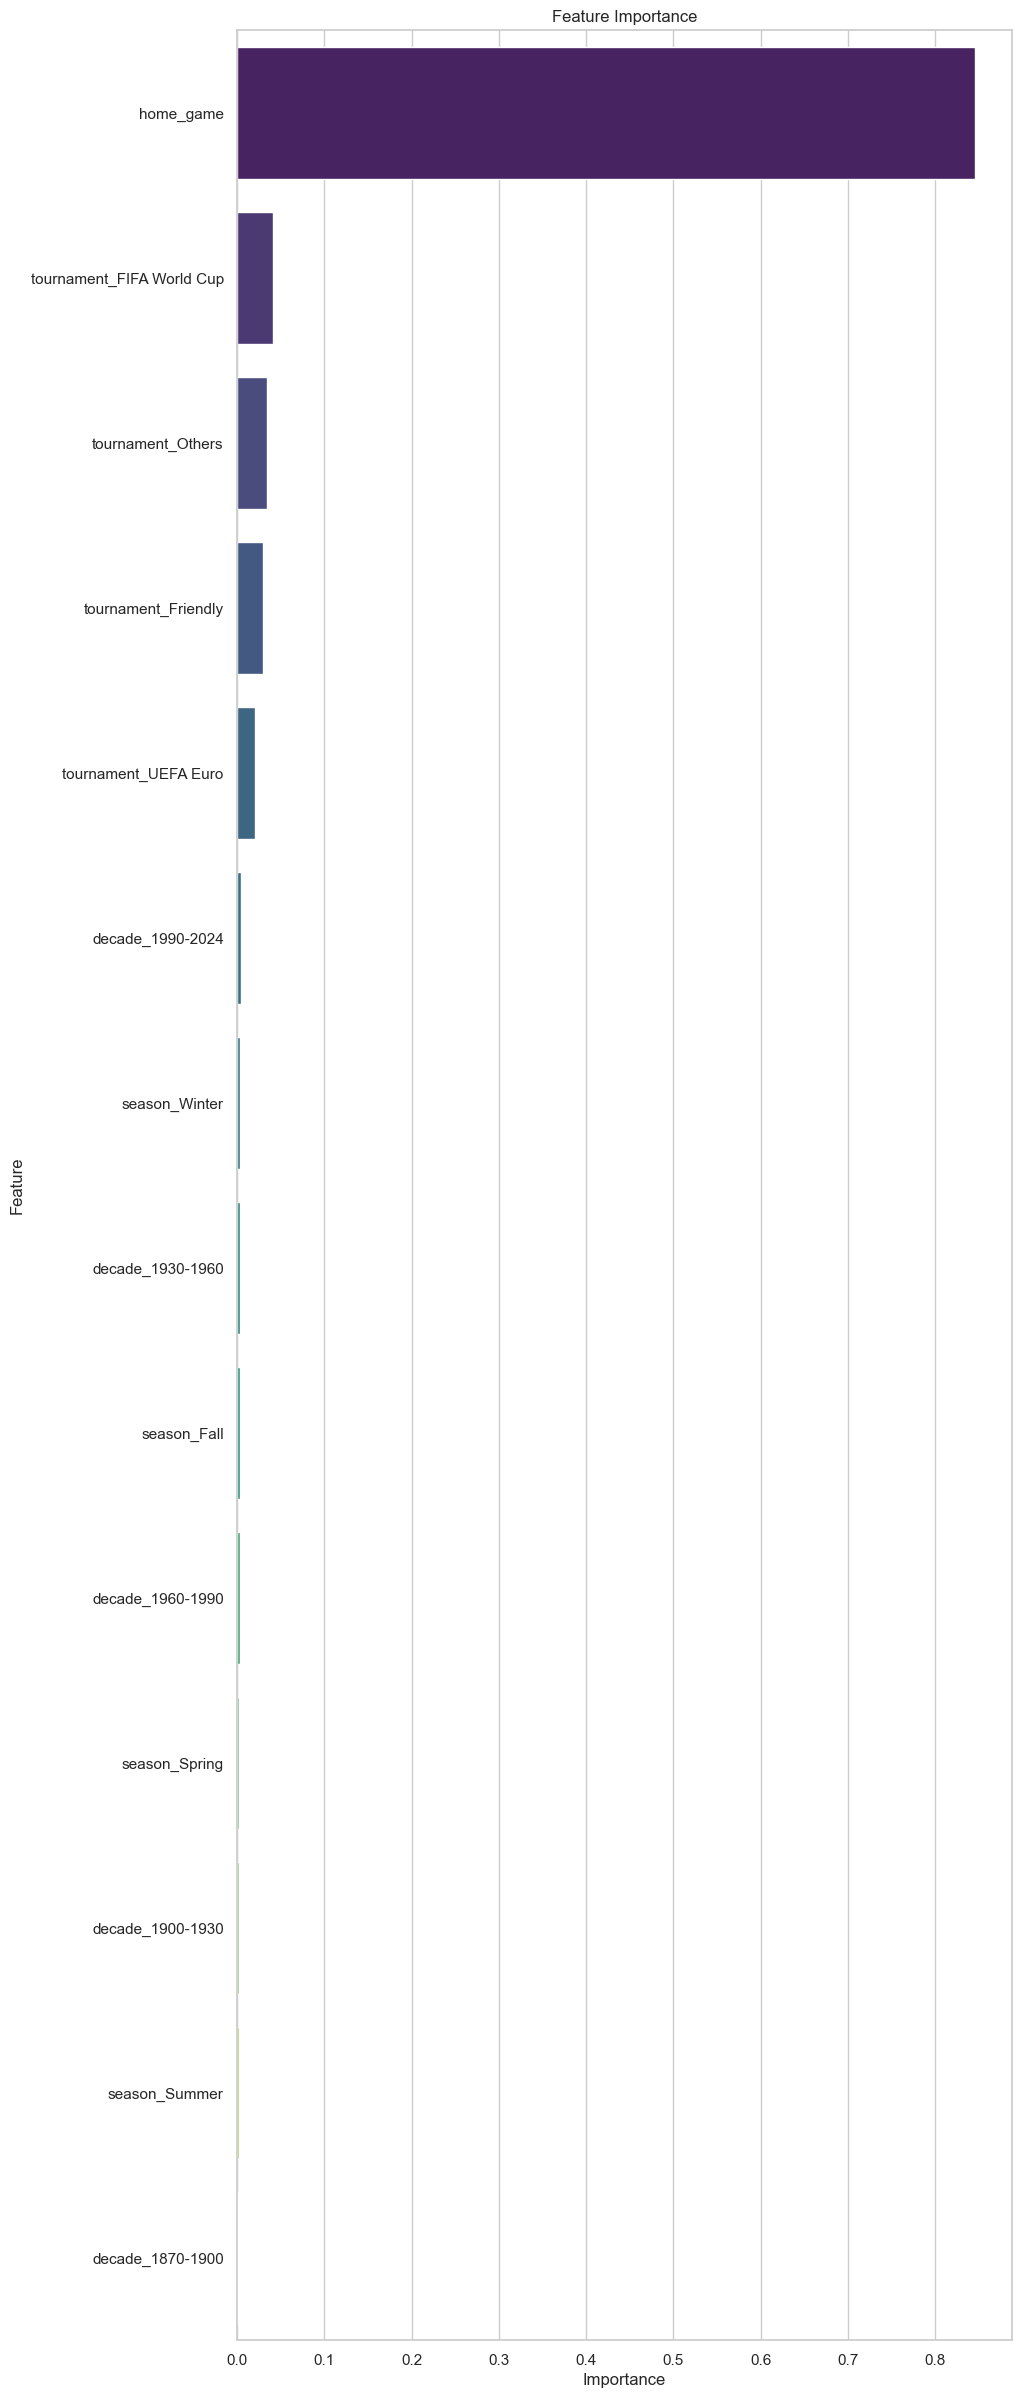

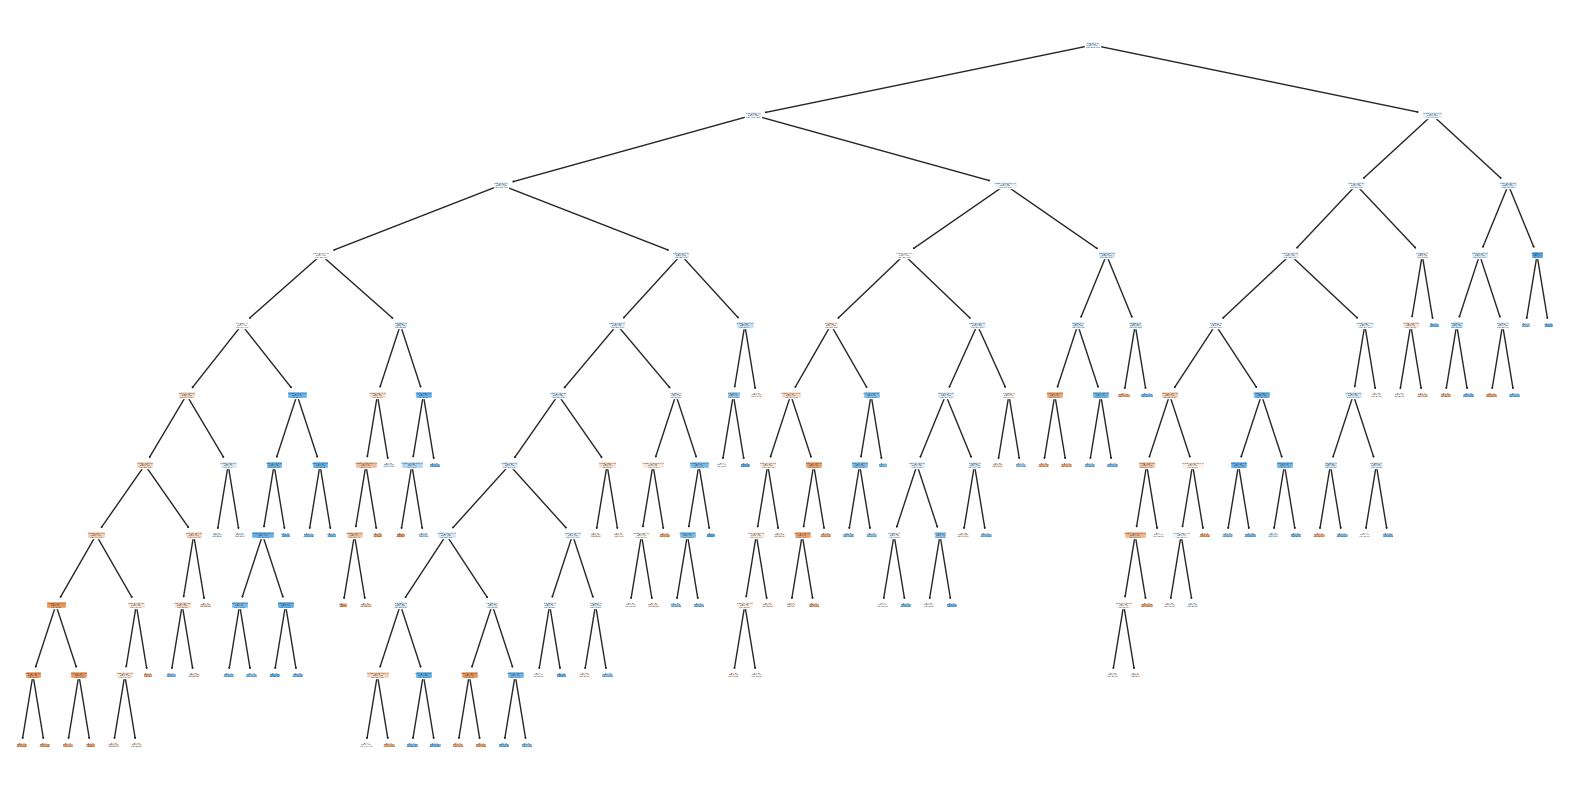

In [188]:
# Run the model with the best deafult number of trees and 10 max depth for the best accuracy and visualize the feature importance
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=10)
RFmodel.fit(X_train, y_train)
y_pred = RFmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy}')

# Feature Importance
feature_importance = pd.Series(RFmodel.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 30))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')

plt.ylabel('Feature')
plt.show()

# Plot the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RFmodel.estimators_[0], feature_names=X.columns, filled=True)
plt.show()


# DecisionTreeClassifier based ADA Boost Model

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Validation Accuracy: 0.6997600674405032


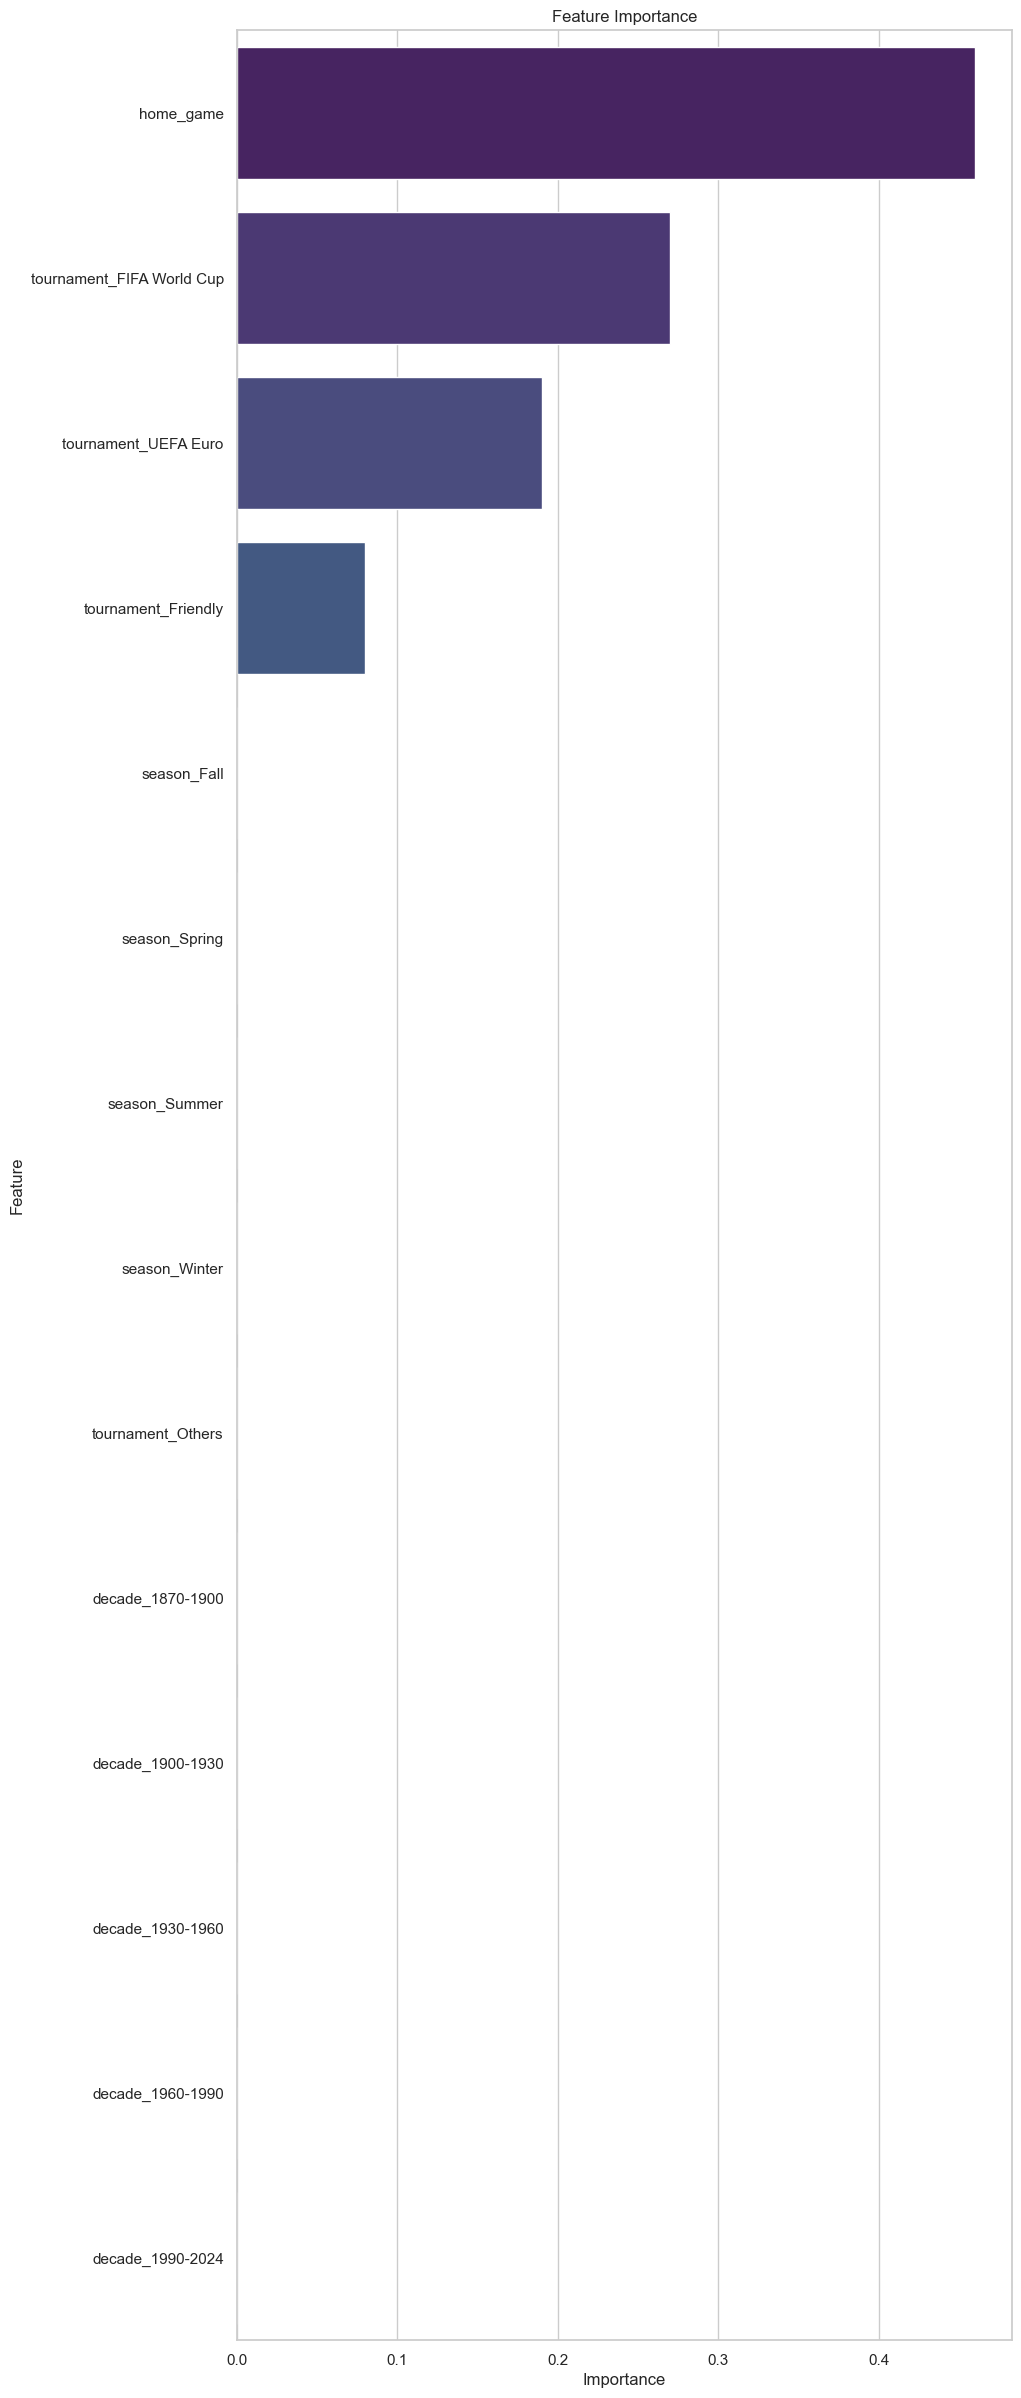

In [191]:
# Train the model using the training set
AdaBoostmodel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.1)

AdaBoostmodel.fit(X_train, y_train)

# Make predictions using the validation set
y_pred = AdaBoostmodel.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy}')

# Feature Importance
feature_importance = pd.Series(AdaBoostmodel.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 30))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


We can see that the model is not performing better than the Random Forest model. The accuracy is similar to the Random Forest model. We will try to do some hyperparameter tuning to see if we can improve the model. We are also can see that the best features are the location of the match and the tournament of the match, the temporal features are not important for the model.

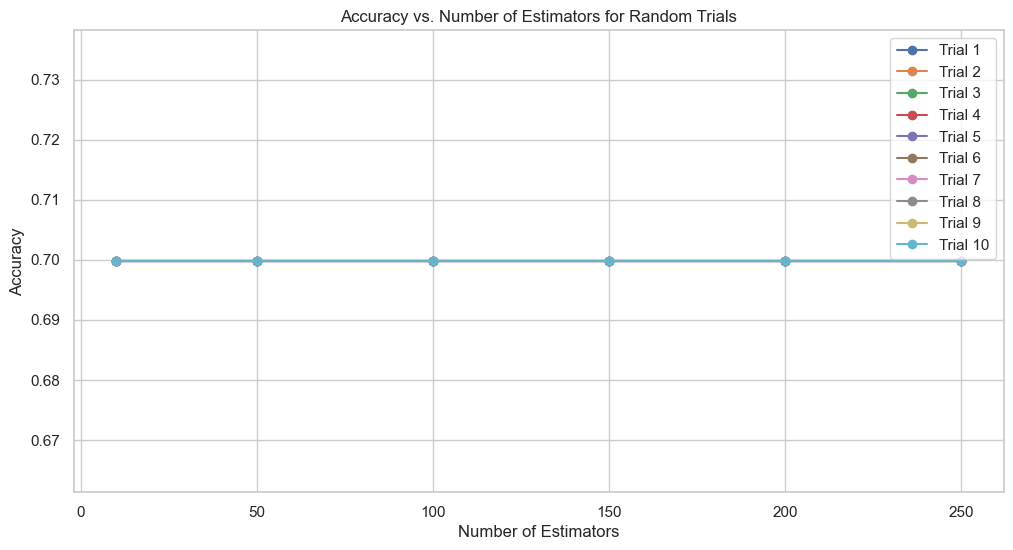

In [197]:
# Find the number of estimators that gives the best accuracy
n_estimators = [10, 50, 100, 150, 200, 250]

random_trials = []

for i in range(10):
    accuracies = []
    for n in n_estimators:
        AdaBoostmodel = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n, learning_rate=0.1)
        AdaBoostmodel.fit(X_train, y_train)
        y_pred = AdaBoostmodel.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)
    random_trials.append(accuracies)

# Create a line plot of the accuracy vs. number of trees for each random trial
plt.figure(figsize=(12, 6))
for i, trial in enumerate(random_trials):
    plt.plot(n_estimators, trial, marker='o', label=f'Trial {i+1}')

plt.title('Accuracy vs. Number of Estimators for Random Trials')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


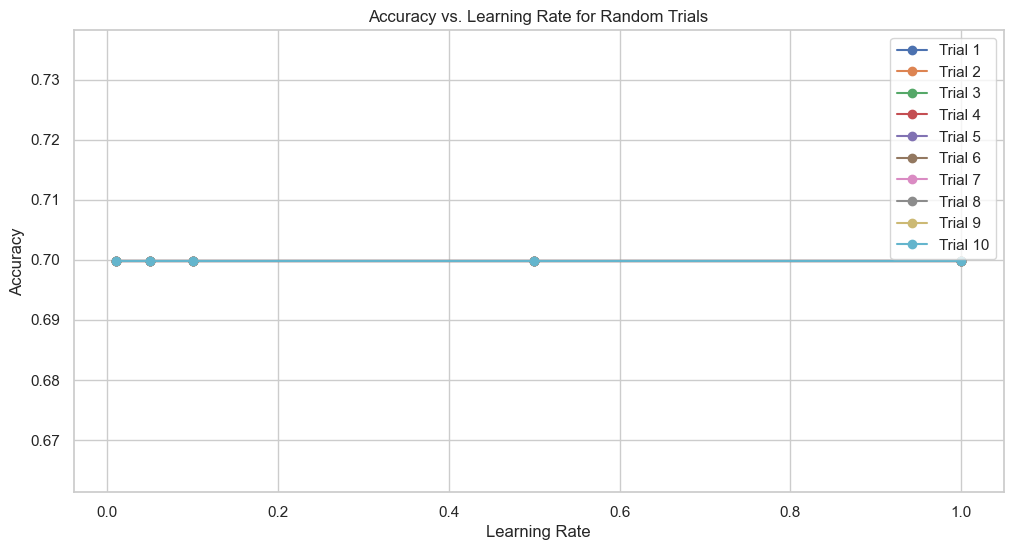

In [194]:
# Find the number of estimators that gives the best accuracy
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

random_trials = []

for i in range(10):
    accuracies = []
    for n in learning_rates:
        AdaBoostmodel = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=n)
        AdaBoostmodel.fit(X_train, y_train)
        y_pred = AdaBoostmodel.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)
    random_trials.append(accuracies)

# Create a line plot of the accuracy vs. number of trees for each random trial
plt.figure(figsize=(12, 6))
for i, trial in enumerate(random_trials):
    plt.plot(learning_rates, trial, marker='o', label=f'Trial {i+1}')

plt.title('Accuracy vs. Learning Rate for Random Trials')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


We can see that the model is not performing better than the Random Forest model even after hyperparameter tuning. The accuracy is similar to the Random Forest model. Also, the hyperparameter tuning is not improving the model.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Accuracy: 0.7135261315004539


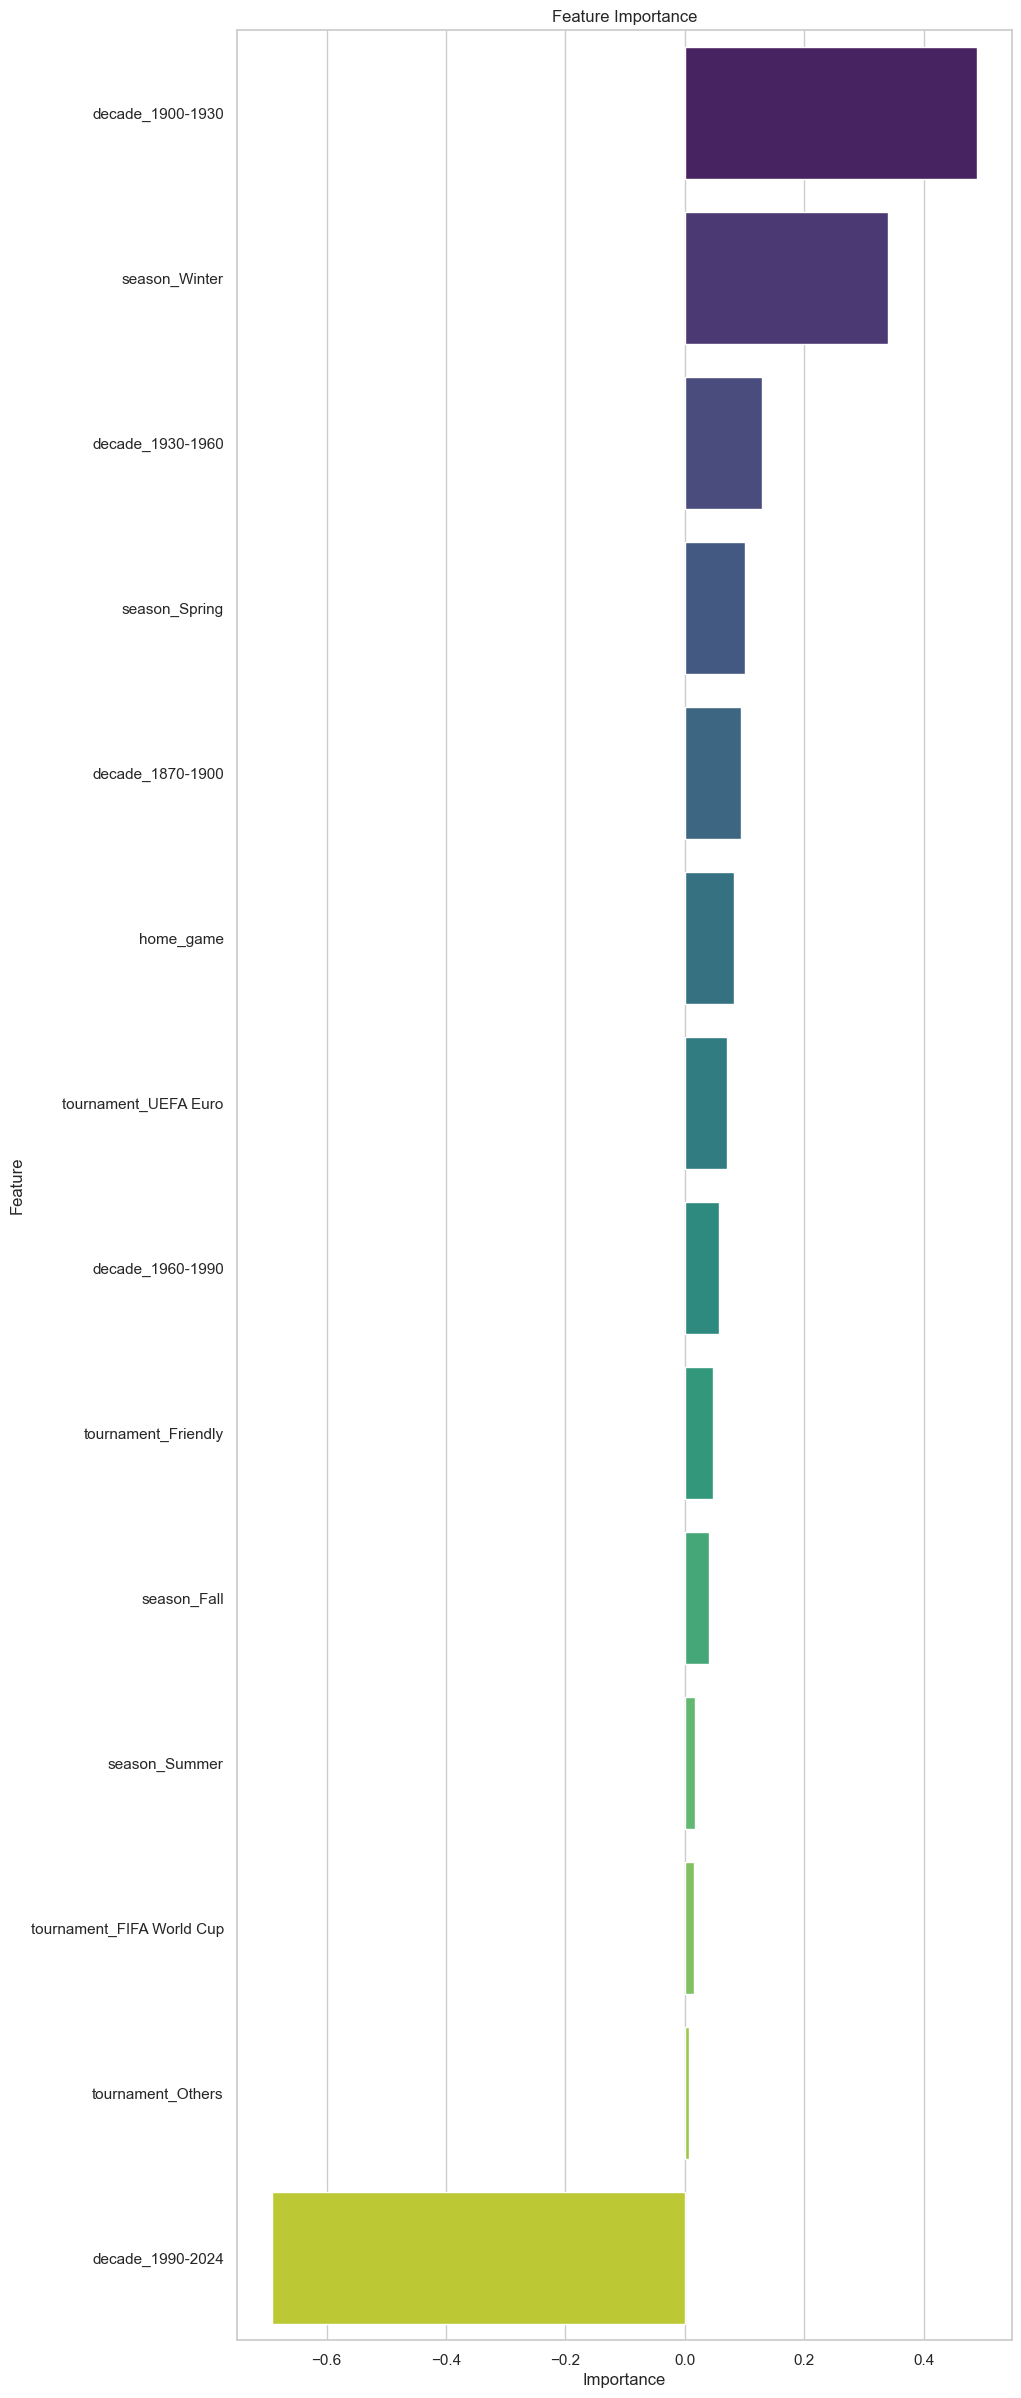

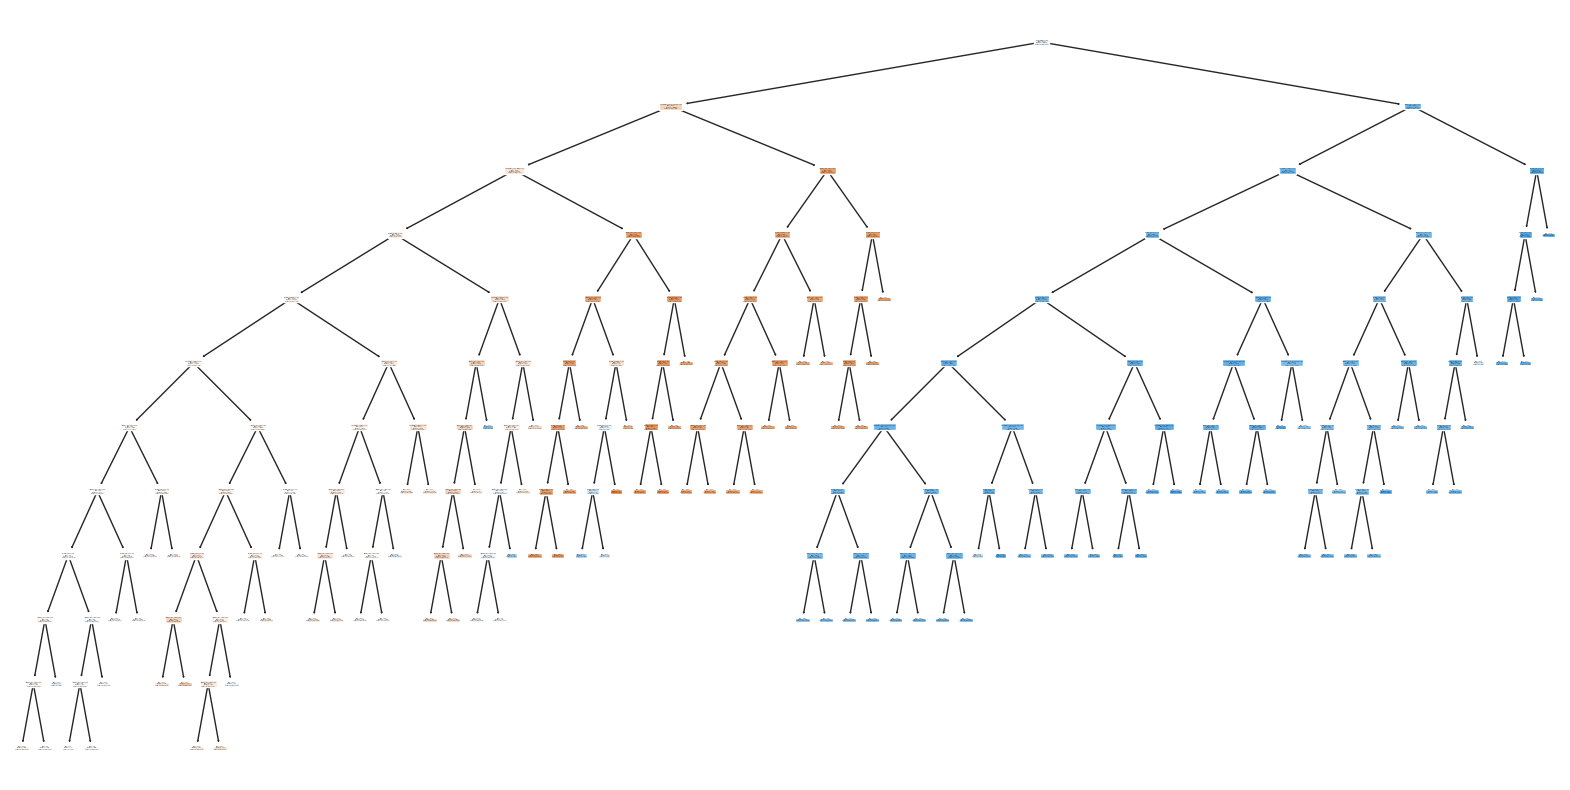

In [195]:
# Run the model with the default number of estimators and learning rate and visualize the results
AdaBoostmodel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
AdaBoostmodel.fit(X_train, y_train)
y_pred = AdaBoostmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy}')

# Feature Importance
feature_importance = pd.Series(AdaBoostmodel.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 30))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(AdaBoostmodel.estimators_[0], feature_names=X.columns, filled=True)
plt.show()


We can see that on the test set the model is performing better than the Random Forest model. The accuracy is similar to the Random Forest model but a little bit better. Also, we can see the negative values of the feature importance for the decade of the 1990-2024. We can interpreting the negative values altorgh that they are uncommon but can occur due to the way the contributions of weak learners are aggregated. They indicate that the presence of these features, in the context of the model, can reduce the overall predictive performance.

We also know that the records of the 1990-2024 decade are not enough to make a good prediction. So it can be a good idea to remove them from the dataset.

In [198]:
# Drop the 1990-2024 decade column to avoid multicollinearity
training_model_df.drop(columns='decade_1990-2024', inplace=True)


In [199]:
# Try to train the AdaBoost model again

X = training_model_df.drop(columns=['home_team_won'])
y = training_model_df['home_team_won']

X_train = X[:int(0.7*len(X))]
y_train = y[:int(0.7*len(y))]

X_val = X[int(0.7*len(X)):int(0.9*len(X))]
y_val = y[int(0.7*len(y)):int(0.9*len(y))]

X_test = X[int(0.9*len(X)):]
y_test = y[int(0.9*len(y)):]

In [203]:
# Initialize the model
AdaBoostmodel = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Fit the model
AdaBoostmodel.fit(X_train, y_train)

# Make predictions
y_pred = AdaBoostmodel.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy}')


Validation Accuracy: 0.6997600674405032


In [205]:
# Predict the test set
y_pred = AdaBoostmodel.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.7135261315004539


We can see that the model is may performing better after removing the 1990-2024 decade. 

Validation Accuracy: 0.6997600674405032


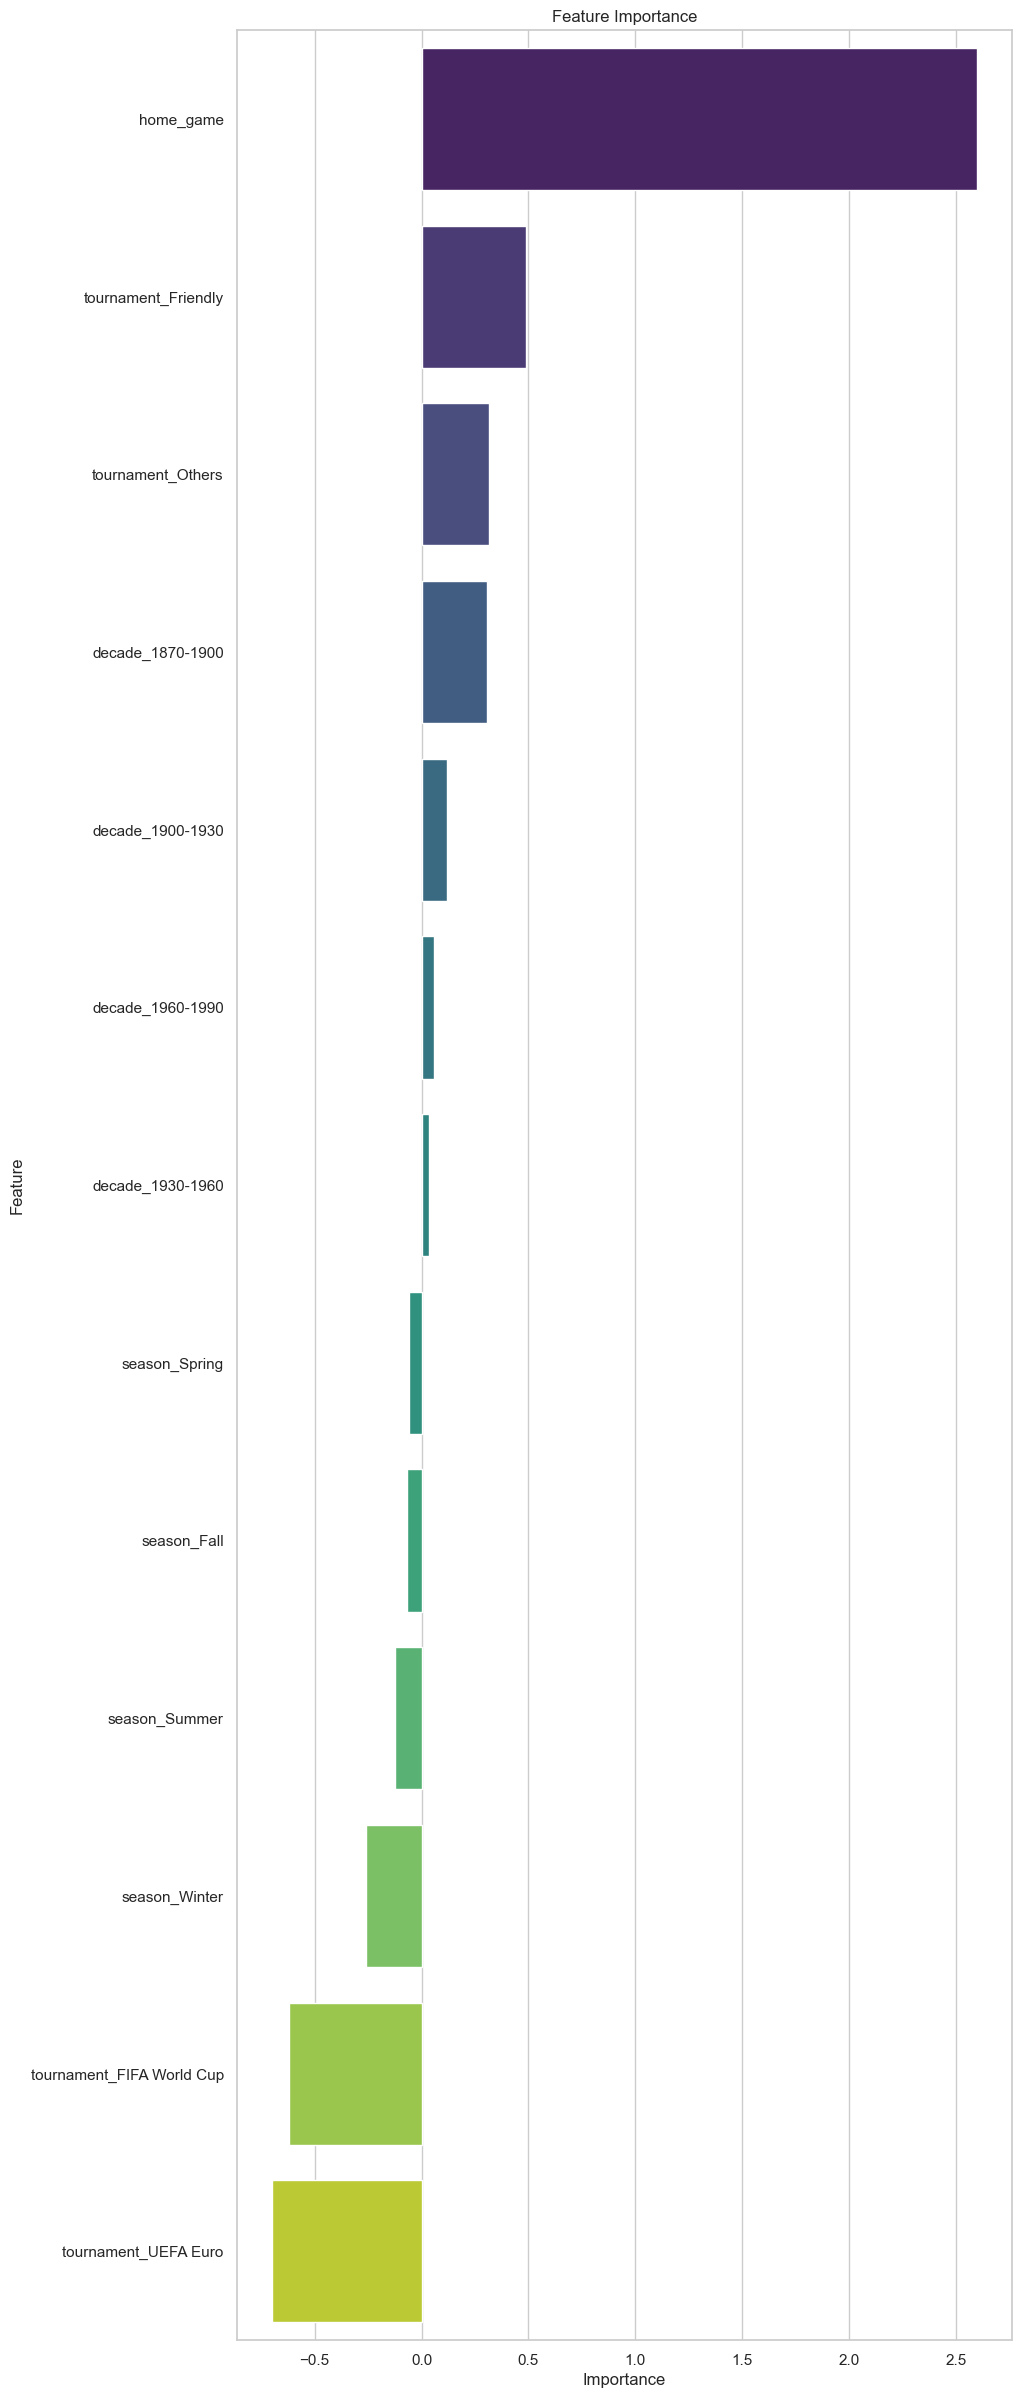

In [209]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# Initialize the logistic regression model
LRmodel = LogisticRegression()

# Fit the model
LRmodel.fit(X_train, y_train)

# Make predictions
y_pred = LRmodel.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy}')

# Feature Importance
feature_importance = pd.Series(LRmodel.coef_[0], index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 30))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


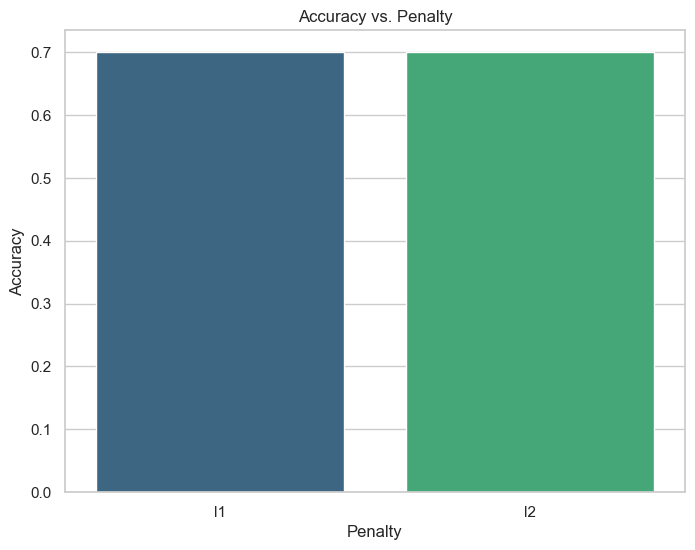

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


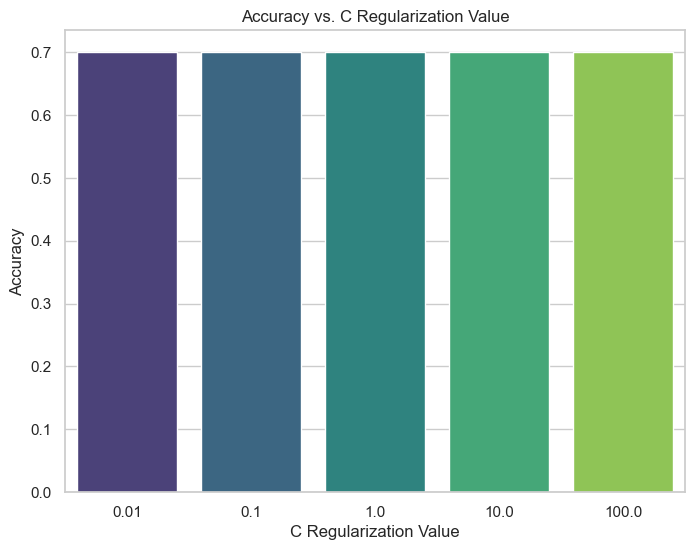

In [211]:
# Use different penalty values for hyperparameter tuning l1 and l2 (Lasso and Ridge)
penalties = ['l1', 'l2']

accuracy_scores = []

for penalty in penalties:
    if penalty == 'l1':
        LRmodel = LogisticRegression(penalty=penalty, solver='liblinear')
    else:
        LRmodel = LogisticRegression(penalty=penalty)
    LRmodel.fit(X_train, y_train)
    y_pred = LRmodel.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
sns.barplot(x=penalties, y=accuracy_scores, palette='viridis')
plt.title('Accuracy vs. Penalty')
plt.xlabel('Penalty')
plt.ylabel('Accuracy')
plt.show()


# Use different C regularization values for hyperparameter tuning
C_values = [0.01, 0.1, 1, 10, 100]

accuracy_scores = []


for C in C_values:
    LRmodel = LogisticRegression(C=C)
    LRmodel.fit(X_train, y_train)
    y_pred = LRmodel.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
sns.barplot(x=C_values, y=accuracy_scores, palette='viridis')
plt.title('Accuracy vs. C Regularization Value')
plt.xlabel('C Regularization Value')
plt.ylabel('Accuracy')
plt.show()


Its looks likr the model is not sensitive to the hyperparameters of the model. The model have a ceiling of the accuracy around 0.7. 

Test Accuracy: 0.7135261315004539


array([[0.84029614, 0.15970386],
       [0.40850089, 0.59149911]])

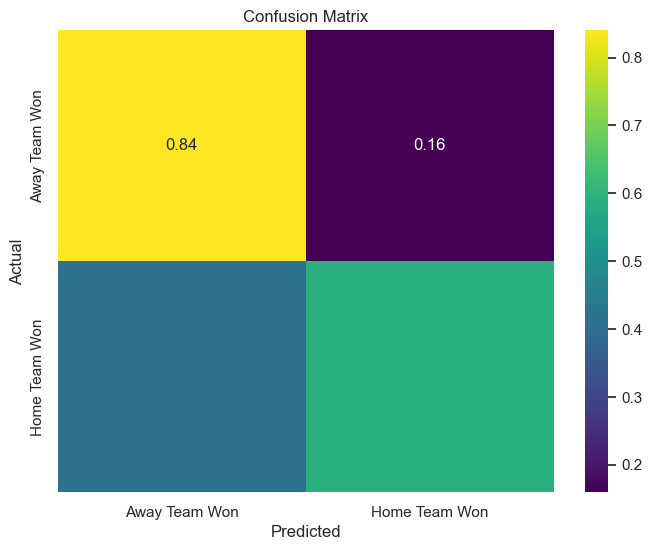

In [217]:
# Run the model with the default hyperparameters and visualize the results
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Test Accuracy: {accuracy}')

# Generate a confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix values to percentages
conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

display(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='viridis', xticklabels=['Away Team Won', 'Home Team Won'], yticklabels=['Away Team Won', 'Home Team Won'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Model Performance:
The logistic regression model achieved a test accuracy of approximately 71.35%. This indicates that the model correctly predicts the outcome of a match about 71.35% of the time on the test set.

## Confusion Matrix Analysis:

The confusion matrix provides further insights into the model’s performance:

True Negatives (Top-Left, 84%): The model correctly predicted 84% of the matches where the away team won.
False Positives (Top-Right, 16%): The model incorrectly predicted 16% of the matches where it predicted the home team would win, but the away team actually won.
False Negatives (Bottom-Left, 41%): The model incorrectly predicted 41% of the matches where it predicted the away team would win, but the home team actually won.
True Positives (Bottom-Right, 59%): The model correctly predicted 59% of the matches where the home team won.

## Interpretation:

High True Negative Rate (84%): The model is very good at correctly predicting when the away team will win. This suggests that the model has learned features that are indicative of away team victories.

False Positive Rate (16%): The relatively low rate of false positives indicates that the model does not often incorrectly predict a home team win when the away team actually wins.

False Negative Rate (41%): The higher false-negative rate suggests that the model sometimes struggles to correctly predict home team victories. There might be features or patterns specific to home team wins that the model is not capturing effectively.

Balanced Accuracy: With an overall accuracy of around 71.35%, the model performs reasonably well. However, there might be room for improvement, particularly in reducing the false negative rate.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest Mean Accuracy: 0.684910187406783
AdaBoost Mean Accuracy: 0.6840931197717398
Logistic Regression Mean Accuracy: 0.6871279424161857


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


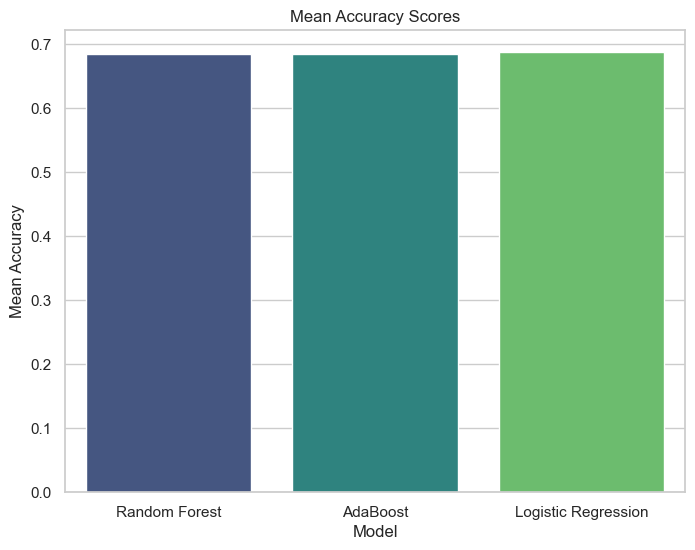

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([[0.81388168, 0.18611832],
       [0.43315231, 0.56684769]])

array([[0.81388168, 0.18611832],
       [0.43315231, 0.56684769]])

array([[0.83609783, 0.16390217],
       [0.44744508, 0.55255492]])

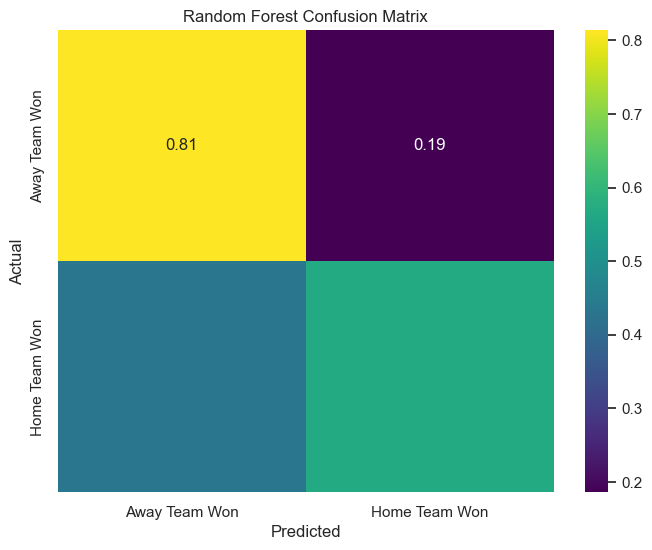

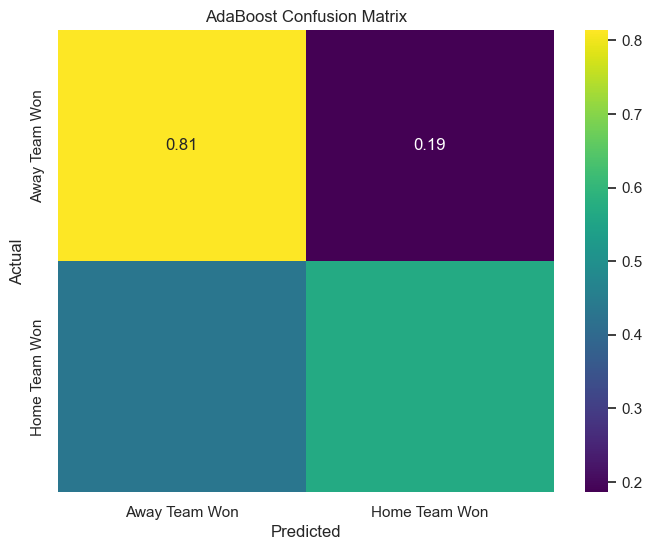

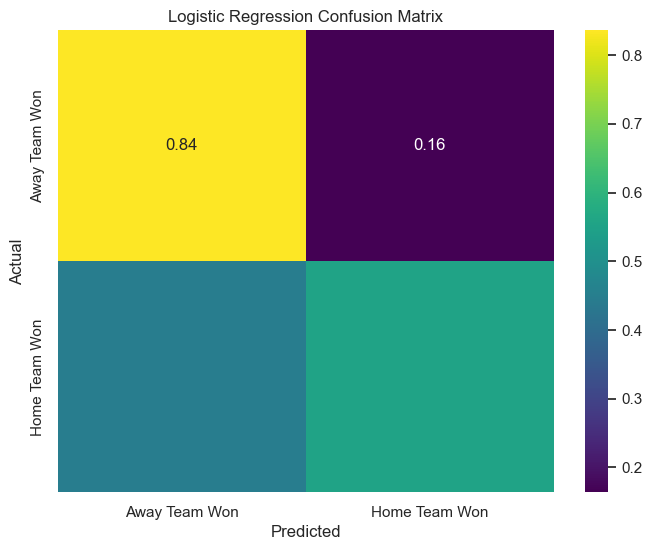

In [218]:
# Cross-validation
from sklearn.model_selection import cross_val_score

# Initialize the models (Random Forest, AdaBoost, Logistic Regression)
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=10)
AdaBoostmodel = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
LRmodel = LogisticRegression()

# Perform cross-validation
RF_scores = cross_val_score(RFmodel, X, y, cv=5)
AdaBoost_scores = cross_val_score(AdaBoostmodel, X, y, cv=5)
LR_scores = cross_val_score(LRmodel, X, y, cv=5)

# Calculate the mean accuracy for each model
RF_mean_accuracy = RF_scores.mean()
AdaBoost_mean_accuracy = AdaBoost_scores.mean()
LR_mean_accuracy = LR_scores.mean()

print(f'Random Forest Mean Accuracy: {RF_mean_accuracy}')
print(f'AdaBoost Mean Accuracy: {AdaBoost_mean_accuracy}')
print(f'Logistic Regression Mean Accuracy: {LR_mean_accuracy}')

# Plot the accuracy scores
plt.figure(figsize=(8, 6))

sns.barplot(x=['Random Forest', 'AdaBoost', 'Logistic Regression'], y=[RF_mean_accuracy, AdaBoost_mean_accuracy, LR_mean_accuracy], palette='viridis')
plt.title('Mean Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.show()

# Create a confusion matrix for the models
from sklearn.model_selection import cross_val_predict

# Perform cross-validation
RF_predictions = cross_val_predict(RFmodel, X, y, cv=5)
AdaBoost_predictions = cross_val_predict(AdaBoostmodel, X, y, cv=5)
LR_predictions = cross_val_predict(LRmodel, X, y, cv=5)

# Generate the confusion matrix for each model
RF_conf_matrix = confusion_matrix(y, RF_predictions)
AdaBoost_conf_matrix = confusion_matrix(y, AdaBoost_predictions)
LR_conf_matrix = confusion_matrix(y, LR_predictions)

# Convert the confusion matrix values to percentages
RF_conf_matrix = RF_conf_matrix / RF_conf_matrix.sum(axis=1)[:, np.newaxis]
AdaBoost_conf_matrix = AdaBoost_conf_matrix / AdaBoost_conf_matrix.sum(axis=1)[:, np.newaxis]
LR_conf_matrix = LR_conf_matrix / LR_conf_matrix.sum(axis=1)[:, np.newaxis]

display(RF_conf_matrix)
display(AdaBoost_conf_matrix)
display(LR_conf_matrix)

# Plot the confusion matrix for each model
plt.figure(figsize=(8, 6))
sns.heatmap(RF_conf_matrix, annot=True, cmap='viridis', xticklabels=['Away Team Won', 'Home Team Won'], yticklabels=['Away Team Won', 'Home Team Won'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(AdaBoost_conf_matrix, annot=True, cmap='viridis', xticklabels=['Away Team Won', 'Home Team Won'], yticklabels=['Away Team Won', 'Home Team Won'])
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(LR_conf_matrix, annot=True, cmap='viridis', xticklabels=['Away Team Won', 'Home Team Won'], yticklabels=['Away Team Won', 'Home Team Won'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Summary of Cross-Validation Results

## Overall Performance Comparison:
Three models were compared using cross-validation: Random Forest, AdaBoost, and Logistic Regression. The mean accuracy scores for each model are as follows:

Random Forest Mean Accuracy: 68.49%
AdaBoost Mean Accuracy: 68.41%
Logistic Regression Mean Accuracy: 68.71%

The Logistic Regression model achieved the highest mean accuracy, although the differences between the models are relatively small.

## Confusion Matrix Analysis:

### Logistic Regression:
True Negatives (84%): Correctly predicted away team wins.
False Positives (16%): Incorrectly predicted home team wins when the away team actually won.
False Negatives (43%): Incorrectly predicted away team wins when the home team actually won.
True Positives (57%): Correctly predicted home team wins.

### AdaBoost:
True Negatives (81%): Correctly predicted away team wins.
False Positives (19%): Incorrectly predicted home team wins when the away team actually won.
False Negatives (45%): Incorrectly predicted away team wins when the home team actually won.
True Positives (55%): Correctly predicted home team wins.
### Random Forest:
True Negatives (81%): Correctly predicted away team wins.
False Positives (19%): Incorrectly predicted home team wins when the away team actually won.
False Negatives (45%): Incorrectly predicted away team wins when the home team actually won.
True Positives (55%): Correctly predicted home team wins.

## Interpretation:

High True Negative Rates: All models have high true negative rates (81-84%), indicating strong performance in predicting away team wins.
False Positives and Negatives: The Logistic Regression model has a slightly lower false positive rate (16%) compared to AdaBoost and Random Forest (both 19%). However, the false negative rate for Logistic Regression is comparable to that of the other models.
True Positives: Logistic Regression has the highest true positive rate (57%), suggesting it is slightly better at predicting home team wins compared to the other models.


In [35]:
# Convert date columns to datetime
results['date'] = pd.to_datetime(results['date'])
goalscorers['date'] = pd.to_datetime(goalscorers['date'])
shootouts['date'] = pd.to_datetime(shootouts['date'])

# Add 'home_team_won' column to results
results['home_team_won'] = results['home_score'] > results['away_score']


# Distribution of match outcomes

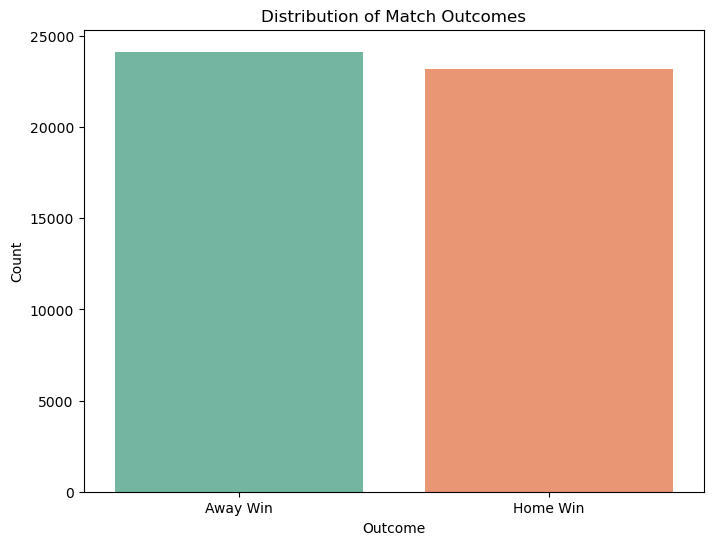

In [36]:

outcomes = results['home_team_won'].value_counts().rename({True: 'Home Win', False: 'Away Win', None: 'Draw'})

plt.figure(figsize=(8, 6))
sns.countplot(data=results, x='home_team_won', palette='Set2')
plt.title('Distribution of Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Away Win', 'Home Win'])
plt.show()

# Distribution of goals scored by the home and away teams

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


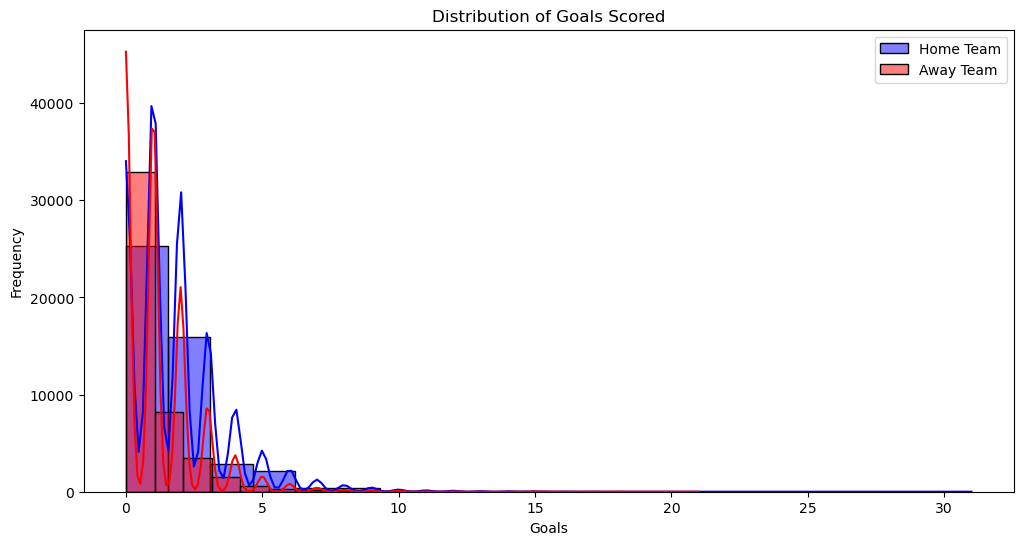

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(results['home_score'], bins=20, kde=True, color='blue', label='Home Team')
sns.histplot(results['away_score'], bins=20, kde=True, color='red', label='Away Team')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Top goal scorers

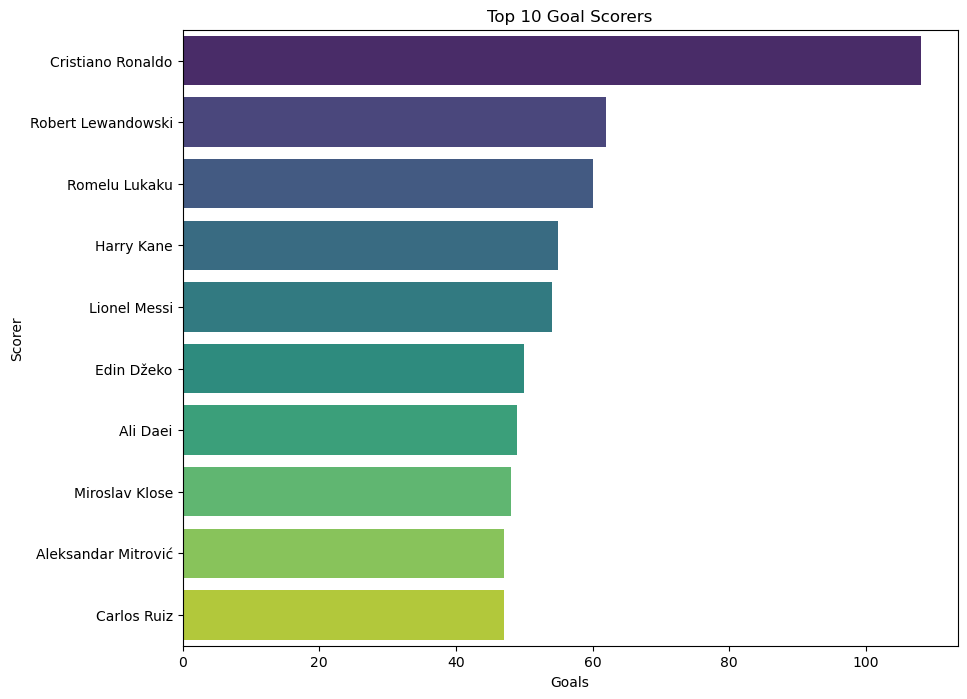

In [38]:
top_scorers = goalscorers['scorer'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_scorers.index, x=top_scorers.values, palette='viridis')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Goals')
plt.ylabel('Scorer')
plt.show()

# Distribution of penalties and own goals

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


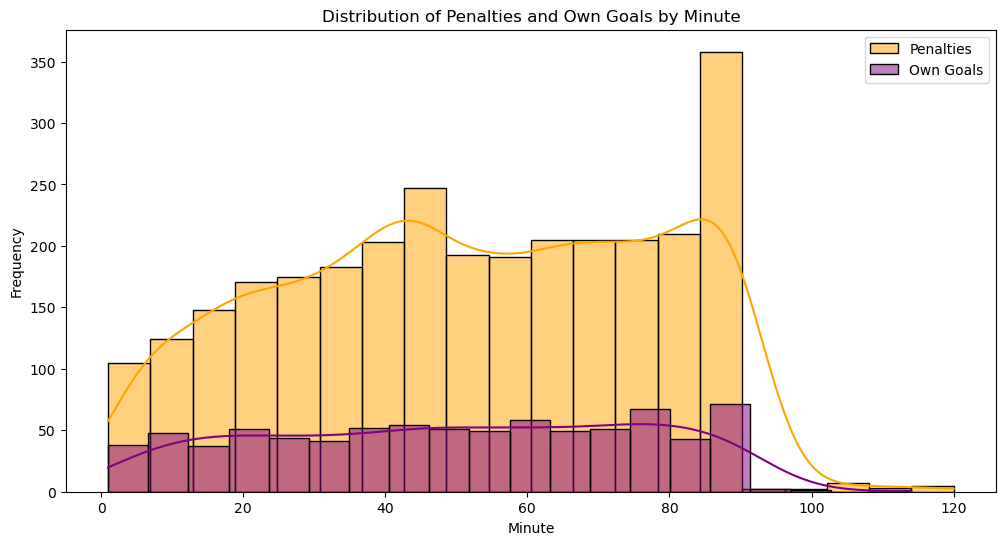

In [39]:
penalties = goalscorers[goalscorers['penalty'] == True]
own_goals = goalscorers[goalscorers['own_goal'] == True]

plt.figure(figsize=(12, 6))
sns.histplot(penalties['minute'], bins=20, kde=True, color='orange', label='Penalties')
sns.histplot(own_goals['minute'], bins=20, kde=True, color='purple', label='Own Goals')
plt.title('Distribution of Penalties and Own Goals by Minute')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.legend()
plt.show()



# Home and Away Team Win Rates

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(results['home_team_win_rate'], bins=30, kde=True, color='blue', label='Home Team Win Rate')
sns.histplot(results['away_team_win_rate'], bins=30, kde=True, color='red', label='Away Team Win Rate')
plt.title('Distribution of Home and Away Team Win Rates')
plt.xlabel('Win Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()


KeyError: 'home_team_win_rate'

<Figure size 1000x600 with 0 Axes>

# Goal Distributions

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


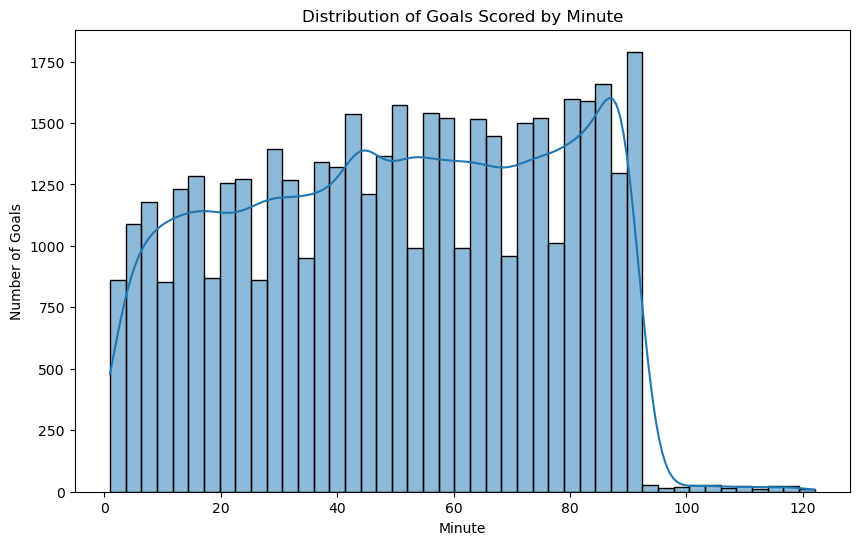

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(goalscorers['minute'], bins=45, kde=True)
plt.title('Distribution of Goals Scored by Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.show()


In [44]:

# Aggregate the number of goals by tournament
goals_by_tournament = results.groupby('tournament').size().reset_index(name='goal_count')

# Sort the tournaments by the number of goals
goals_by_tournament = results.sort_values(by='goal_count', ascending=False)

# Plot the number of goals by tournament
plt.figure(figsize=(15, 8))
plt.barh(goals_by_tournament['tournament'], goals_by_tournament['goal_count'], color='skyblue')
plt.xlabel('Number of Goals')
plt.ylabel('Tournament')
plt.title('Number of Goals by Tournament')
plt.gca().invert_yaxis()
plt.show()


KeyError: 'goal_count'